

<p style="text-align: center; font-size: 22px;">
  Brain Tumor Detection
    <br> Radwan Al Zoubi
    <br> Mays Nael Adeeb Abdel Rahman
</p>


<h2>1. Preparation </h2>
<h3>1.1 Business Understanding</h3>


<h4>1.1.1 Abstract and Overview</h4>
<p>
A brain tumor is a mass of abnormal cells in the brain that can be benign (noncancerous) or malignant (cancerous). Due to the rigid structure of the skull, any growth can increase pressure within the brain, potentially causing damage or becoming life-threatening. Early detection and accurate classification of brain tumors are critical for selecting appropriate treatments and improving patient outcomes. According to the World Health Organization (WHO), proper diagnosis involves detecting the tumor, identifying its location, and classifying it based on type, grade, and malignancy. This dataset, compiled from three sources (figshare, SARTAJ, and Br35H), contains 7,023 human brain MRI images divided into four classes: glioma, meningioma, no tumor, and pituitary.</p>

<h4> 1.1.2 Purpose</h4>
<p>The purpose of creating a Convolutional Neural Network (CNN) for classifying brain tumors based on MRI images is to develop an efficient, accurate, and automated diagnostic tool to assist medical professionals in detecting and categorizing brain tumors. Brain tumors, which can be benign or malignant, require timely and precise diagnosis to ensure effective treatment and improve patient outcomes. A CNN can analyze complex MRI image patterns to identify and classify tumors into specific categories, such as glioma, meningioma, pituitary tumors, or no tumor, with high accuracy. This technology aims to reduce the burden on radiologists, enhance diagnostic consistency, and enable early intervention, ultimately saving lives and improving the quality of healthcare delivery
    
The trained model for classifying brain tumors based on MRI images can be utilized by various third parties, including hospitals and medical centers to assist radiologists in diagnosing tumors efficiently, and research institutions for studying tumor patterns and improving diagnostic methods. Healthcare technology companies can integrate the model into diagnostic tools, while telemedicine providers can deploy it in remote areas to enhance access to specialized care. Educational institutions may use the model for teaching medical imaging and diagnostic techniques, and pharmaceutical companies can apply it to identify and monitor patients for brain tumor treatment clinical trials. Additionally, government and non-governmental organizations can employ the model to provide affordable diagnostic services in underserved regions, improving healthcare accessibility and outcomes.</p>

<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h4>1.1.3 Data Aspects</h4>
    <p>
        The dataset used for this study consists of 7,023 MRI images sourced from three different datasets: 
        <strong>Figshare</strong>, <strong>SARTAJ</strong>, and <strong>Br35H</strong>. These images are categorized into
        four distinct classes:
    </p>
    <ul>
        <li><strong>Glioma:</strong> Tumors arising from glial cells in the brain or spine.</li>
        <li><strong>Meningioma:</strong> Tumors originating in the meninges, the protective layers surrounding the brain and spinal cord.</li>
        <li><strong>Pituitary:</strong> Tumors located in the pituitary gland at the base of the brain.</li>
        <li><strong>No Tumor:</strong> MRI scans without any abnormalities.</li>
    </ul>
    <p>
        You can access the dataset on <a href="https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset" target="_blank">https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset</a>.


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score, roc_curve ,auc
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn import metrics as mt
import tensorflow as tf
import sys
import matplotlib
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.layers import Reshape, Add, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import average 
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import FeatureSpace
from tensorflow.keras.layers import Embedding
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import RandomFlip, RandomRotation,RandomWidth,RandomHeight,RandomContrast,RandomTranslation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import  Model
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
import cv2
from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
from ipywidgets import widgets 
from PIL import Image
import seaborn as sns
from skimage.io import imshow
from sklearn.metrics import precision_score, recall_score
import numpy as np
from tensorflow.keras.metrics import Precision, Recall
from keras.layers import SeparableConv2D
from keras.layers import Add, Flatten, Dense, Input
from keras.layers import average, concatenate
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

<h3>1.2 Evaluation Metrics</h3>

<p>For the task of classifying brain tumors based on MRI images, evaluating the model’s performance requires careful consideration of the implications of false negatives and false positives. False negatives, where a patient with a tumor is incorrectly classified as not having one, can delay diagnosis and treatment, allowing the tumor to progress to more severe stages and potentially endangering the patient’s life. On the other hand, false positives, where a healthy patient is misclassified as having a tumor, can lead to significant emotional distress, unnecessary diagnostic procedures, and potentially harmful or costly treatments. To address these critical issues, recall and precision have been chosen as the primary evaluation metrics for the model.

Recall measures the proportion of true positive predictions among all actual positive cases, ensuring the model captures as many true tumor cases as possible and minimizes the risk of false negatives. Precision evaluates the proportion of true positives among all positive predictions, ensuring that predictions indicating the presence of a tumor are highly accurate, thereby reducing the number of false positives. 

By prioritizing recall and precision the model aims to achieve a balance between identifying as many true tumor cases as possible while minimizing unnecessary stress and interventions for patients. This approach aligns with the business goal of delivering accurate and trustworthy diagnostic support, ultimately improving patient outcomes and healthcare efficiency.</p>

In [120]:
metrics=[Precision(name='precision'),Recall(name='recall')]

In [121]:
labels = ['glioma','meningioma','notumor','pituitary']

In [122]:
# get the path/directory
file_path  = r"brain-tumor-DS/"          


glioma_dir = os.listdir(file_path + 'glioma/')
meningioma_dir  = os.listdir(file_path + 'meningioma/')
notumor_dir  = os.listdir(file_path + 'notumor/')
pituitary_dir  = os.listdir(file_path + 'pituitary/')

glioma_imgs = []
meningioma_imgs = []
notumor_imgs = []
pituitary_imgs = []

labels = []
h, w = (100, 100)

#read in glioma images
error_count = 0
for img in glioma_dir:
    image = cv2.imread(file_path + 'glioma/' + img, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (h, w))
    try:
        glioma_imgs.append(image.flatten())
        labels.append(1)
    except:
        error_count += 1
#------------------------------------------------------------------------------------------------------------------#            
#read in meningioma data
for img in meningioma_dir:
    image = cv2.imread(file_path + 'meningioma/' + img, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (h, w))
    try:
        meningioma_imgs.append(image.flatten())
        labels.append(2)
    except:
        error_count += 1
#------------------------------------------------------------------------------------------------------------------#        
#read in notumor data
for img in notumor_dir:
    image = cv2.imread(file_path + 'notumor/' + img, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (h, w))
    try:
        notumor_imgs.append(image.flatten())
        labels.append(0)
    except:
        error_count += 1        
#-------------------------------------------------------------------------------------------------------------------#
#read in pituitary data
for img in pituitary_dir:
    image = cv2.imread(file_path + 'pituitary/' + img, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (h, w))
    try:
        pituitary_imgs.append(image.flatten())
        labels.append(3)
    except:
        error_count += 1                    
#------------------------------------------------------------------------------------------------------------------#                
data = glioma_imgs + meningioma_imgs+notumor_imgs+pituitary_imgs
data = np.array(data)
labels = np.array(labels)

#shuffle data
rstate = np.random.get_state()
np.random.shuffle(data)
np.random.set_state(rstate)
np.random.shuffle(labels)

print("{} Images failed to read".format(error_count))
print("Image size:", data[0].shape)
print("Image count:", len(data))

0 Images failed to read
Image size: (10000,)
Image count: 7023


<p>Resizing the brain tumor MRI dataset to \(64 \times 64\) pixels is a practical and effective decision that ensures consistency and compatibility with deep learning models. The original dataset consists of images with varying dimensions, and resizing them to a fixed resolution standardizes the data, enabling efficient batch processing and seamless integration with machine learning workflows. A resolution of \(64 \times 64\) strikes an excellent balance between retaining sufficient detail for tumor detection and optimizing computational efficiency. By reducing the dimensionality of the images, this resolution lowers memory requirements and accelerates the training process, making it suitable for real-time applications.

Moreover, the resolution is compatible with many state-of-the-art pretrained CNN architectures, facilitating the use of transfer learning to enhance model performance. This resolution is particularly well-suited for MRI images, as the structural features and abnormalities associated with brain tumors are typically large enough to be effectively captured. Resizing to this resolution ensures that the model is lightweight, efficient, and deployable in practical healthcare scenarios where computational resources may be limited. This choice provides a strong foundation for developing accurate and reliable deep learning models to classify brain tumors while maintaining practicality and scalability for real-world use.</p>

Number of images for glioma is 1621.
Number of images for meningioma is 1645.
Number of images for notumor is 2000.
Number of images for pituitary is 1757.


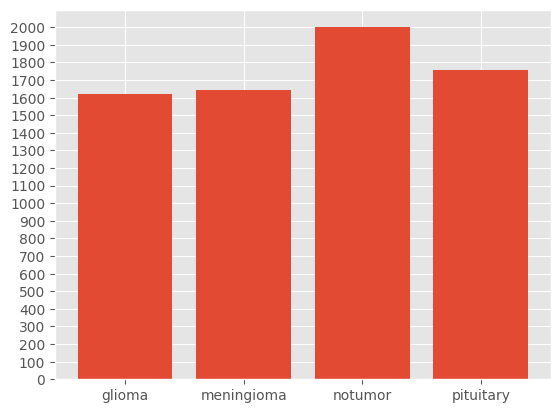

In [123]:
Category = ['glioma','meningioma','notumor','pituitary']

print(f'Number of images for {Category[0]} is {len(glioma_imgs)}.')
print(f'Number of images for {Category[1]} is {len(meningioma_imgs)}.')
print(f'Number of images for {Category[2]} is {len(notumor_imgs)}.')
print(f'Number of images for {Category[3]} is {len(pituitary_imgs)}.')


plt.bar(Category,[len(glioma_imgs),len(meningioma_imgs),len(notumor_imgs),len(pituitary_imgs)])
plt.yticks(np.arange(0, 2100, step=100))
plt.show()

In [124]:
classes = {1:"Glioma", 0:"No Tumor", 2:"Meningioma",3: "Pituitary"}


def plot_gallery(images, titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(2 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)),cmap=plt.cm.gray)
        plt.title(classes[titles[i]], size=10)
        plt.xticks(())
        plt.yticks(())

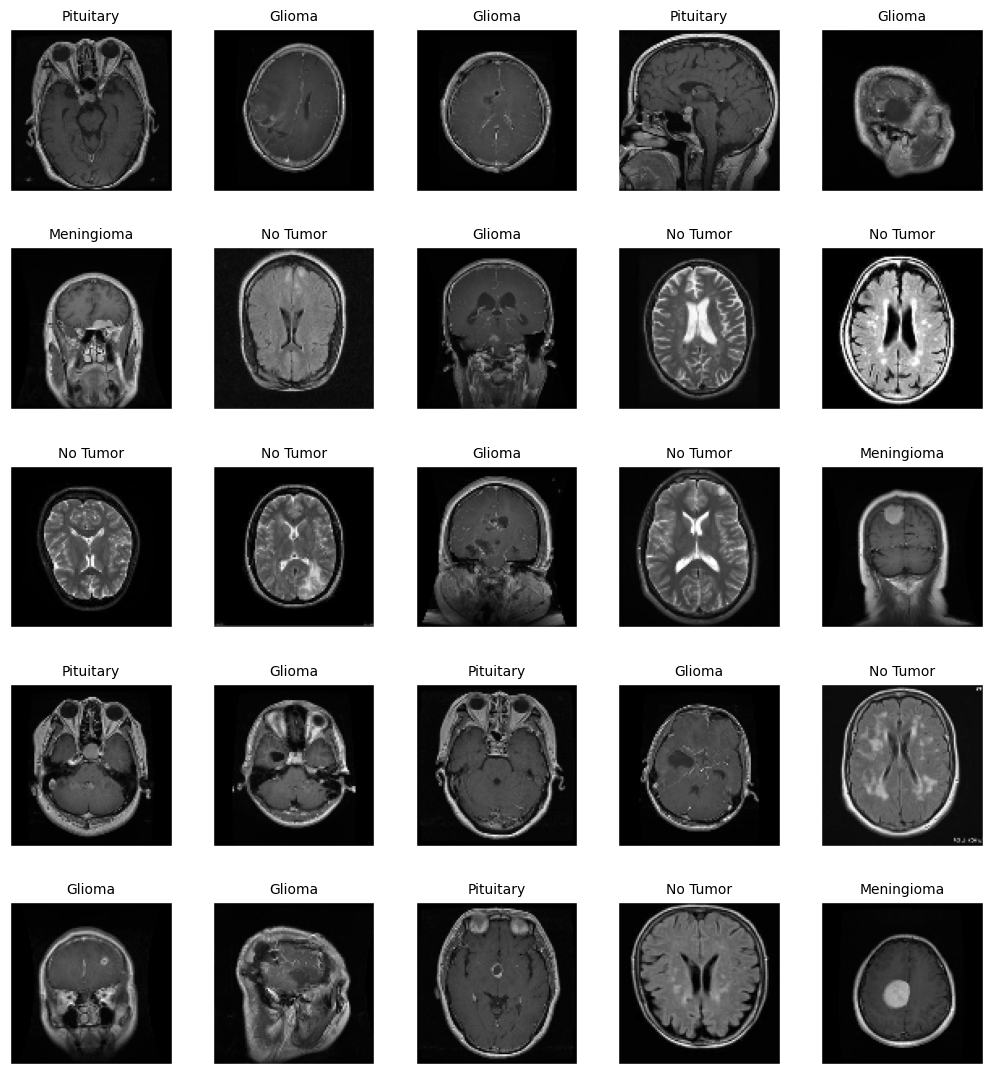

In [125]:
plot_gallery(data, labels, h,w)

<h4>1.3 Data Splitting</h4>
<p>For the brain tumor classification task, the chosen method for dividing the dataset into training and testing sets is Stratified Shuffle Splits. This approach ensures that the class distribution in both the training and test sets reflects the overall dataset, which is particularly important for imbalanced datasets such as this one, where the occurrence of glioma, meningioma, pituitary tumor, and no tumor classes may vary significantly. Stratified Shuffle Splits divide the data multiple times into randomized training and test sets, while preserving the proportion of each class, providing a realistic evaluation of the model's performance. By shuffling the data before each split, the method prevents overfitting to a static split and ensures robust testing under varied conditions. Additionally, using a fixed random state enables reproducibility of results, making it easier to debug and compare experiments. This method mirrors real-world scenarios where models are evaluated on unseen data with similar class distributions to the population. Stratified K-Fold Cross-Validation, while effective in maximizing data utilization, is computationally more expensive and less suited for deep learning models due to the iterative training process. Stratified Shuffle Splits, on the other hand, provide independent test sets for realistic evaluation and allow for variability across multiple iterations, making it an efficient and practical choice for this task. This ensures that the model is tested thoroughly and reflects its generalizability in real-world applications.</p>

In [126]:
num_cv_iterations =3
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size=0.2, 
                         random_state=7324)
print(cv_object)

StratifiedShuffleSplit(n_splits=3, random_state=7324, test_size=0.2,
            train_size=None)


<h2>2.Modeling </h2>

<h3>2.1 Data Augmentation</h3>

<p>The two most appropriate data augmentation techniques for a brain tumor MRI dataset, as implemented in the provided code, are **rotation** and **translation**. 

**Rotation** is beneficial because MRI scans often exhibit slight variations in patient positioning during image acquisition. Simulating this variability with small rotations (e.g., ±10%) enhances the model's robustness to such real-world inconsistencies without compromising the anatomical or clinical integrity of the brain structure. This makes it a safe and effective choice for augmenting the dataset. 

**Translation**, on the other hand, addresses minor shifts in imaging due to patient movement or slight misalignments during the scanning process. By applying minimal translations (e.g., height and width adjustments of ±1%), the model becomes more adaptable to these small spatial variations while maintaining the clinical accuracy and structural consistency of the images. 

Together, these two techniques complement each other by balancing geometric transformations that preserve anatomical integrity while effectively increasing dataset diversity for improved model generalization.</p>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomRotation, RandomBrightness

Data_augmentation = Sequential()
Data_augmentation.add(RandomRotation(factor=0.1))  # Rotates images up to ±10%
Data_augmentation.add( RandomTranslation(height_factor=0.01, width_factor=0.01) )  

<h3>2.2 Convolutional Neural Network</h3>

<p>In this section, four convolutional neural network (CNN) models based on the architecture of AlexNet and residual networks were created using Keras. The models share several key features in their design. The activation function used throughout the convolutional and fully connected layers, except the last layer, is ReLU (Rectified Linear Unit). For the final output layer, a softmax activation function is employed to predict the probabilities across the four classes. The models are trained using the Adam optimizer, which provides efficient adaptive learning. The loss function utilized is categorical crossentropy, specifically designed for multi-class classification tasks. The evaluation metrics include precision, recall, and loss, computed for both training and validation phases to assess model performance.


In multi-class classification, the `Precision` and `Recall` metrics in Keras compute the precision and recall for each class independently and then macro-average the results. The model outputs a probability distribution for each class, typically using a softmax activation. Keras determines the predicted class for each sample by applying an `argmax` operation on these probabilities to select the class with the highest value. For each class, precision is calculated as the proportion of true positive predictions out of all predictions made for that class, while recall is the proportion of true positive predictions out of all actual occurrences of that class in the dataset. After computing precision and recall for each class, the results are averaged equally across all classes (macro-averaging), ensuring that each class contributes equally to the final metrics, regardless of class imbalance. This behavior is built-in, making `tensorflow.keras.metrics.Precision` and `tensorflow.keras.metrics.Recall` straightforward to use without additional configuration.



</p>

<h4>2.2.1 model 1 </h4>

The Key features of the first CNN model:

- **Total Number of Filters**: 48 filters (16 in the first convolutional layer, 32 in the second convolutional layer).

- **Pooling Type**: Max pooling is used after each convolutional layer.

- **Dropout**:
  - A dropout rate of **0.25** is applied after the convolutional layers to reduce overfitting.
  - A dropout rate of **0.5** is applied after the first dense layer for additional regularization.

- **Dense Layers**:
  - The first dense layer has **256 neurons** with a **ReLU** activation function.
  - The second dense layer is the output layer with **4 neurons** and a **softmax** activation function for multi-class classification.


In [128]:
%%time

cnn1 = Sequential()
cnn1.add(RandomRotation(factor=0.01))  # Rotates images up to ±10%
cnn1.add( RandomTranslation(height_factor=0.01, width_factor=0.01) )
num_filt_layers = [16, 32]
for num_filters in num_filt_layers:
    cnn1.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu',
                    ) ) 


    cnn1.add( MaxPooling2D(pool_size=(2, 2) ) )
    
# add one layer on flattened output
cnn1.add( Dropout(0.25) ) # add some dropout for regularization after conv layers
cnn1.add( Flatten() )
cnn1.add( Dense(256, activation='relu') )
cnn1.add( Dropout(0.5) ) # add some dropout for regularization, again!
cnn1.add( Dense(4, activation='softmax') )

# Let's train the model 
cnn1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=metrics)
input_shape = [None,h,w,1]
cnn1.build(input_shape)
print(cnn1.summary())


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation_9 (RandomRotation)   │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_8                 │ (None, 100, 100, 1)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 100, 100, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 20000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │       5,120,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,126,084 (19.55 MB)

 Trainable params: 5,126,084 (19.55 MB)

 Non-trainable params: 0 (0.00 B)

None
CPU times: total: 172 ms
Wall time: 60.8 ms



Stratified shuffle split number:  1
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 1.0157 - precision: 0.6776 - recall: 0.3526 - val_loss: 0.4405 - val_precision: 0.8617 - val_recall: 0.8114
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.4759 - precision: 0.8385 - recall: 0.7796 - val_loss: 0.3872 - val_precision: 0.8782 - val_recall: 0.8420
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.3663 - precision: 0.8775 - recall: 0.8435 - val_loss: 0.2708 - val_precision: 0.9105 - val_recall: 0.8982
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.2869 - precision: 0.8951 - recall: 0.8751 - val_loss: 0.3560 - val_precision: 0.8866 - val_recall: 0.8683
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.2434 - precision: 0.9155 - recall: 0.8961 - val_loss: 0.2450 - val_precision: 0.9140 - val_recall: 0.9075
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.1933 - precision: 0.9329 - recall: 0.9246 - val_l

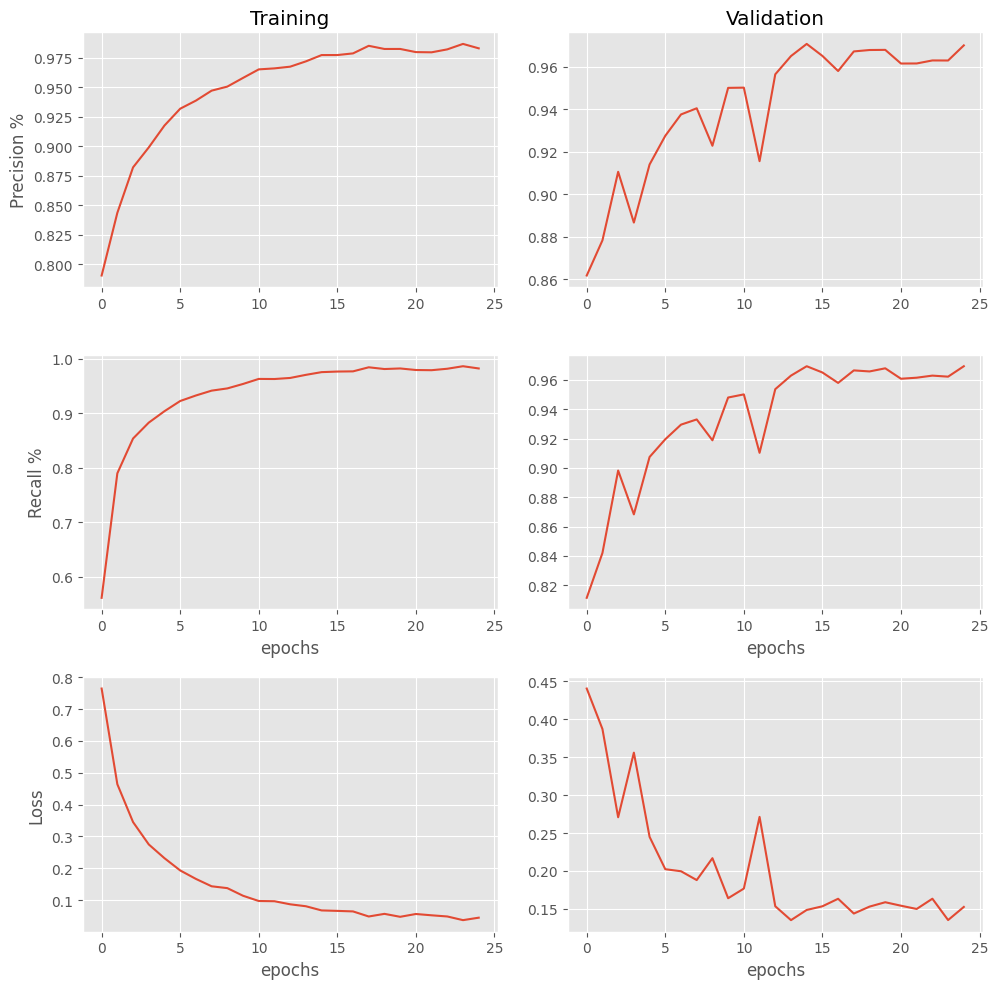




Stratified shuffle split number:  2
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0480 - precision: 0.9863 - recall: 0.9853 - val_loss: 0.0398 - val_precision: 0.9907 - val_recall: 0.9907
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.0626 - precision: 0.9793 - recall: 0.9787 - val_loss: 0.0292 - val_precision: 0.9943 - val_recall: 0.9943
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0437 - precision: 0.9869 - recall: 0.9859 - val_loss: 0.0376 - val_precision: 0.9922 - val_recall: 0.9922
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0307 - precision: 0.9915 - recall: 0.9914 - val_loss: 0.0388 - val_precision: 0.9943 - val_recall: 0.9943
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0373 - precision: 0.9876 - recall: 0.9872 - val_loss: 0.0350 - val_precision: 0.9950 - val_recall: 0.9950
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0405 - precision: 0.9867 - recall: 0.9865 - val

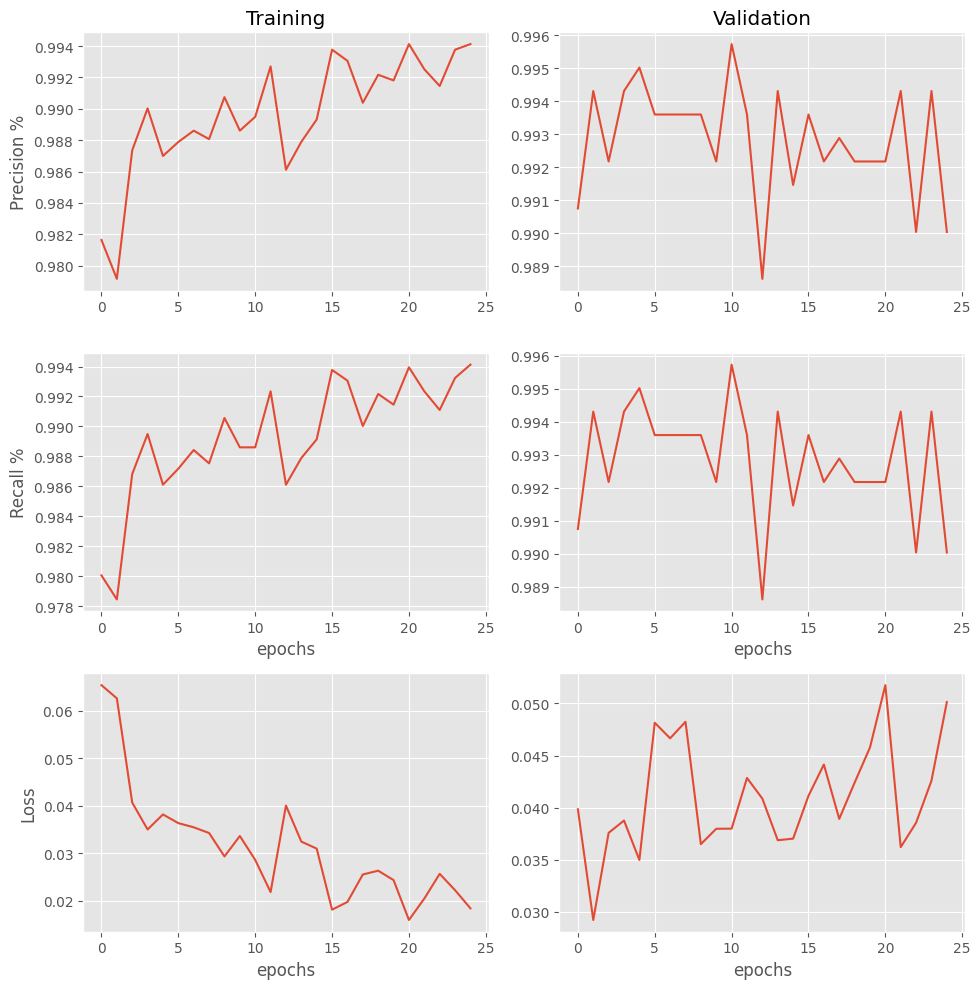




Stratified shuffle split number:  3
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0443 - precision: 0.9872 - recall: 0.9869 - val_loss: 0.0011 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0299 - precision: 0.9909 - recall: 0.9908 - val_loss: 0.0011 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0279 - precision: 0.9906 - recall: 0.9899 - val_loss: 8.8784e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0201 - precision: 0.9927 - recall: 0.9927 - val_loss: 0.0035 - val_precision: 0.9986 - val_recall: 0.9986
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0242 - precision: 0.9929 - recall: 0.9929 - val_loss: 0.0033 - val_precision: 0.9993 - val_recall: 0.9993
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0282 - precision: 0.9914 - recall: 0.9911 -

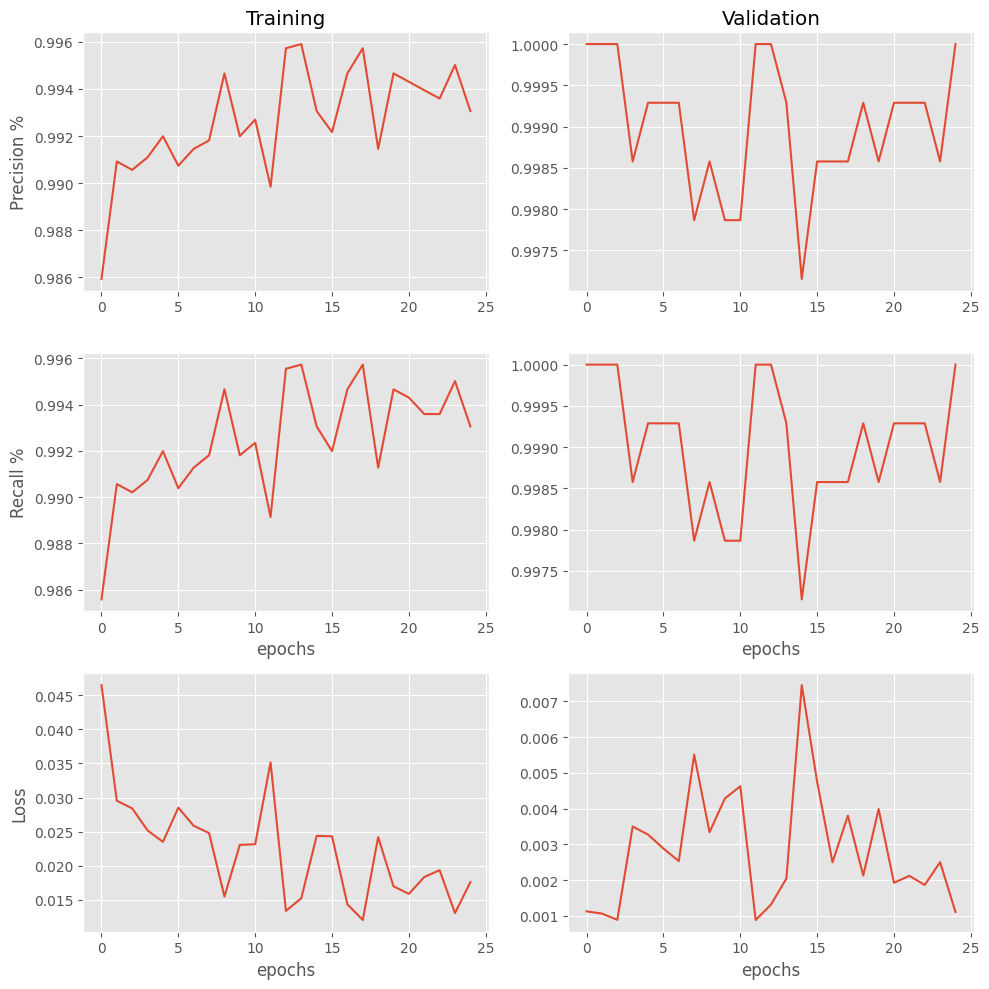



CPU times: total: 2h 4min 56s
Wall time: 13min 47s


In [129]:
%%time 
NUM_CLASSES= 4
cnn1_precision = [] # this stores the precision for our model from all cross_validation
cnn1_recall = [] # this stores the precision for our model from all cross_validation
data = np.expand_dims(data.reshape((-1, h, w)), axis=3)/255
cnn1_cv = [] # this stores the yhat_vec from all cross_validation
i = 0 
for train_index, test_index in cv_object.split(data, labels):
    print()
    print("Stratified shuffle split number: ", i+1)
    i +=1
    
    X_train, X_test = data[train_index], data[test_index]
    y_train,  y_test = labels[train_index], labels[test_index]
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

    history = cnn1.fit(X_train, y_train_ohe, batch_size=32, 
                      epochs=25, verbose=1,
                      shuffle=True,
                      validation_data=(X_test,y_test_ohe),)   
    
    yhat = np.round(cnn1.predict(X_test)) # yhat is one-hot encoded prediction of y
    yhat_vec = [] # yhat_vec stores prediction of y in a vector form
    
    # change yhat from one-hot encoded form to a vector form
    for j in range(len(yhat)):
        if yhat[j][1] == 1:
            yhat_vec.append(1)
        else:
            yhat_vec.append(0)
            
    cnn1_cv.append(yhat_vec)

    cnn1_precision.append(history.history['val_precision'])
    cnn1_recall.append(history.history['val_recall'])

    plt.figure(figsize=(10,10))
    
    plt.subplot(3,2,1)
    plt.plot(history.history['precision'])
    plt.ylabel('Precision %')
    plt.title('Training')
    
    plt.subplot(3,2,2)
    plt.plot(history.history['val_precision'])
    plt.title('Validation')
    
    plt.subplot(3,2,3)
    plt.plot(history.history['recall'])
    plt.ylabel('Recall %')
    plt.xlabel('epochs')
    
    plt.subplot(3,2,4)
    plt.plot(history.history['val_recall'])
    plt.xlabel('epochs')
    
    plt.subplot(3,2,5)
    plt.plot(history.history['loss'])
    plt.ylabel('Loss')
    plt.xlabel('epochs')

    plt.subplot(3,2,6)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.tight_layout()
    plt.show() 
    
    print()
    print()


<h4>2.2.2 Model 2</h4>



The architecture of the second CNN model is designed to incorporate random augmentations for regularization. Below are the key features of the model:





- **Random Rotation**: Rotates images with a factor of ±1%.
- **Random Translation**: Translates images with height and width factors of ±1%.


- The model has two convolutional layers:
  - **First Convolutional Layer**: 32 filters with a 3x3 kernel.
  - **Second Convolutional Layer**: 64 filters with a 3x3 kernel.


- **Max Pooling** is applied after each convolutional layer, with a pool size of 2x2.


- A **dropout rate of 0.25** is applied after the convolutional layers to reduce overfitting.
- A **dropout rate of 0.5** is applied after the first dense layer for additional regularization.


- The output of the convolutional layers is **flattened** before being fed into the dense layers.


- **First Dense Layer**: 
  - 256 neurons with a **ReLU** activation function.
- **Second Dense Layer**:
  - 4 neurons with a **softmax** activation function for multi-class classification.


- **Loss Function**: Categorical crossentropy, appropriate for multi-class classification.
- **Optimizer**: Adam optimizer.
- **Evaluation Metrics**: Precision, recall, and loss.

This model integrates data augmentation techniques, dropout layers, and max pooling for improved performance and robustness in multi-class classification tasks.


In [130]:
%%time

cnn2 = Sequential()
cnn2.add(RandomRotation(factor=0.01))  # Rotates images up to ±10%
cnn2.add( RandomTranslation(height_factor=0.01, width_factor=0.01) )
num_filt_layers = [32, 64]
for num_filters in num_filt_layers:
    cnn2.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu',
                    ) ) 


    cnn2.add( MaxPooling2D(pool_size=(2, 2) ) )
    
# add one layer on flattened output
cnn2.add( Dropout(0.25) ) # add some dropout for regularization after conv layers
cnn2.add( Flatten() )
cnn2.add( Dense(256, activation='relu') )
cnn2.add( Dropout(0.5) ) # add some dropout for regularization, again!
cnn2.add( Dense(4, activation='softmax') )

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=metrics)
input_shape = [None,h,w,1]
cnn2.build(input_shape)
print(cnn2.summary())


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation_10 (RandomRotation)  │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_9                 │ (None, 100, 100, 1)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 100, 100, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │      10,240,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,260,100 (39.14 MB)

 Trainable params: 10,260,100 (39.14 MB)

 Non-trainable params: 0 (0.00 B)

None
CPU times: total: 250 ms
Wall time: 84.2 ms



Stratified shuffle split number:  1
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 24s 131ms/step - loss: 1.0615 - precision: 0.8737 - recall: 0.6402 - val_loss: 0.4843 - val_precision: 0.8561 - val_recall: 0.8043
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - loss: 0.4524 - precision: 0.8430 - recall: 0.7932 - val_loss: 0.3559 - val_precision: 0.8784 - val_recall: 0.8534
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - loss: 0.3383 - precision: 0.8802 - recall: 0.8557 - val_loss: 0.2702 - val_precision: 0.9132 - val_recall: 0.8989
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.2733 - precision: 0.9005 - recall: 0.8798 - val_loss: 0.2479 - val_precision: 0.9213 - val_recall: 0.9082
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.2215 - precision: 0.9199 - recall: 0.9107 - val_loss: 0.2281 - val_precision: 0.9176 - val_recall: 0.9117
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.1993 - precision: 0.9262 - recall: 0.9193 -

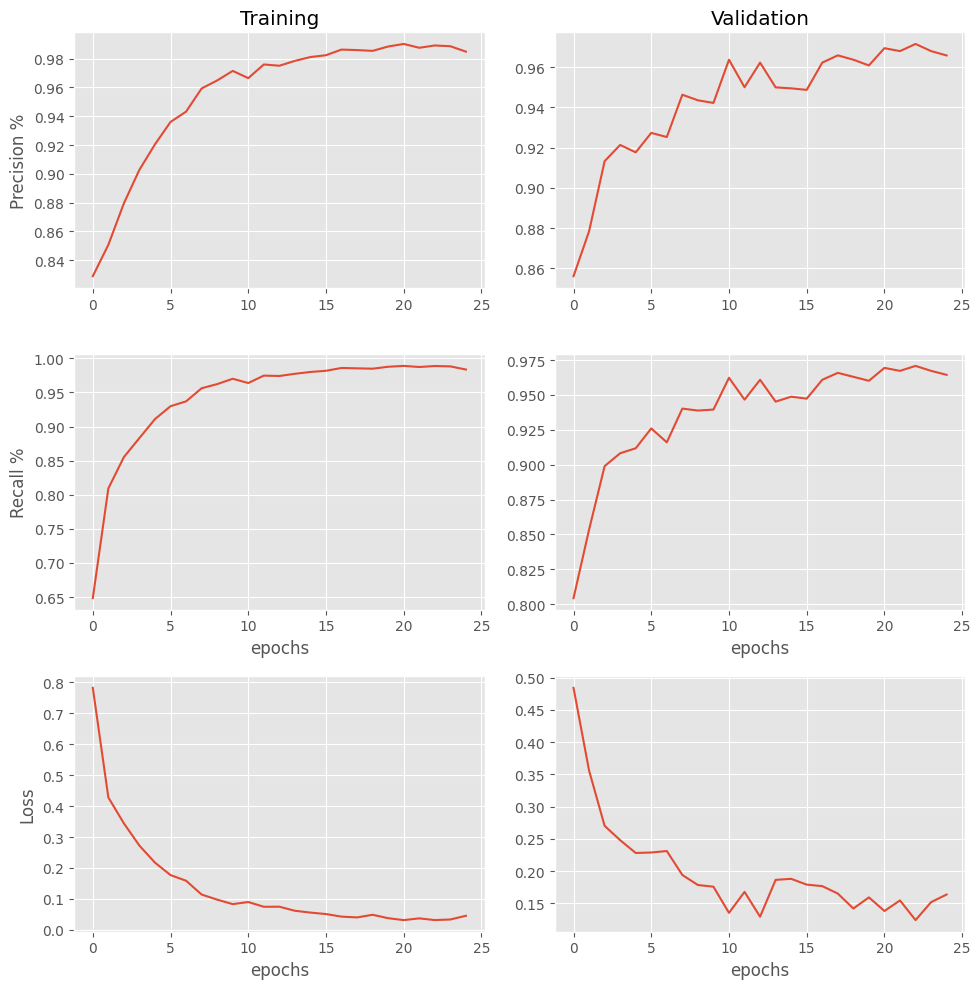




Stratified shuffle split number:  2
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.0763 - precision: 0.9787 - recall: 0.9774 - val_loss: 0.0269 - val_precision: 0.9957 - val_recall: 0.9957
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.0436 - precision: 0.9849 - recall: 0.9841 - val_loss: 0.0521 - val_precision: 0.9865 - val_recall: 0.9865
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.0408 - precision: 0.9845 - recall: 0.9845 - val_loss: 0.0341 - val_precision: 0.9950 - val_recall: 0.9950
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.0288 - precision: 0.9901 - recall: 0.9900 - val_loss: 0.0294 - val_precision: 0.9950 - val_recall: 0.9950
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - loss: 0.0394 - precision: 0.9871 - recall: 0.9865 - val_loss: 0.0304 - val_precision: 0.9943 - val_recall: 0.9943
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.0220 - precision: 0.9924 - recall: 0.9924

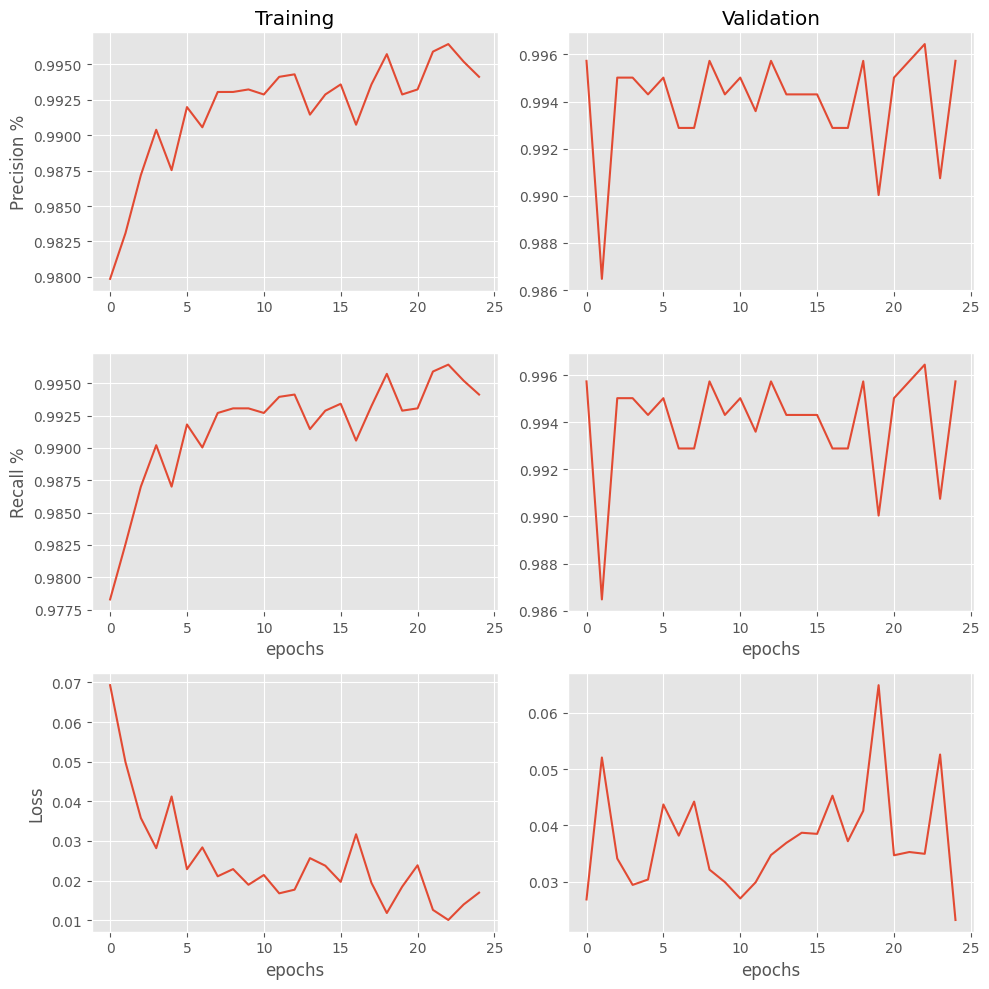




Stratified shuffle split number:  3
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.0587 - precision: 0.9842 - recall: 0.9836 - val_loss: 7.2413e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - loss: 0.0233 - precision: 0.9923 - recall: 0.9923 - val_loss: 0.0012 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.0221 - precision: 0.9930 - recall: 0.9930 - val_loss: 0.0010 - val_precision: 0.9993 - val_recall: 0.9993
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - loss: 0.0241 - precision: 0.9923 - recall: 0.9917 - val_loss: 6.2488e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - loss: 0.0146 - precision: 0.9944 - recall: 0.9944 - val_loss: 2.1382e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - loss: 0.0138 - precision: 0.9955 - re

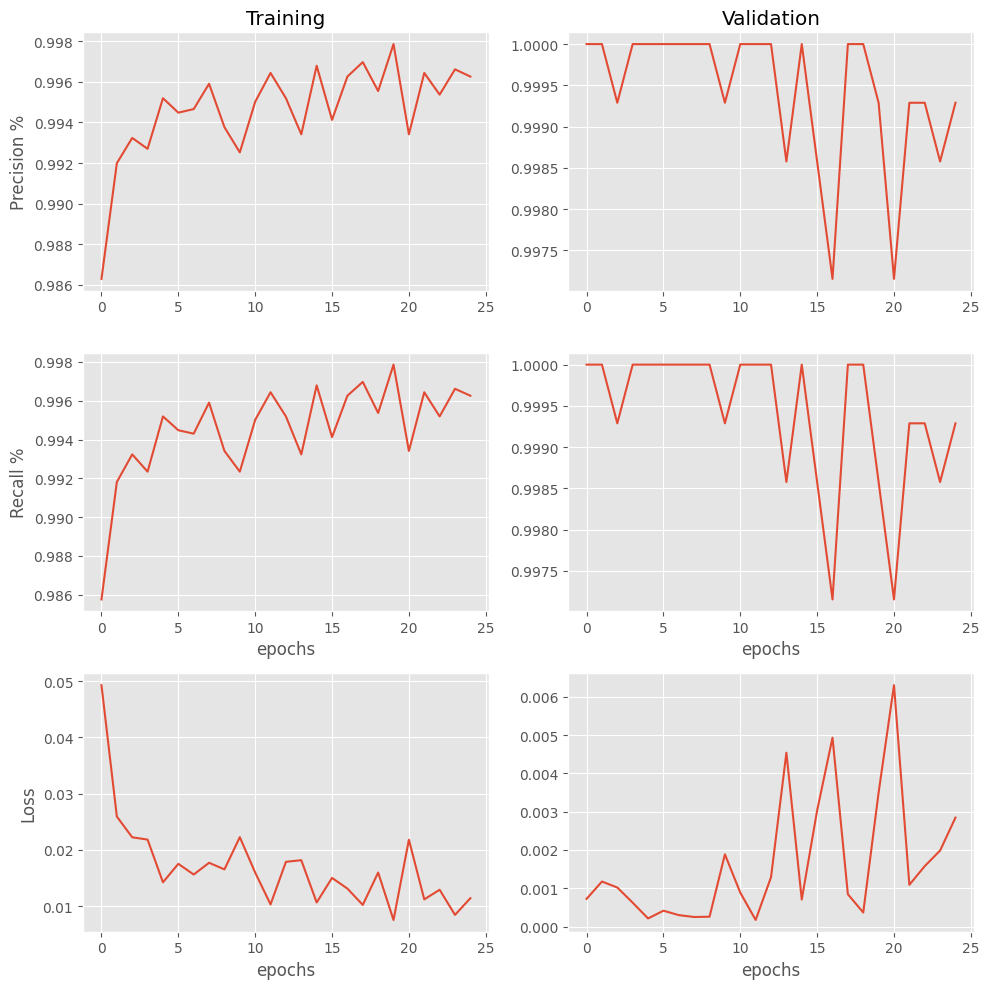



CPU times: total: 4h 34min 47s
Wall time: 28min 25s


In [131]:
%%time 
NUM_CLASSES= 4
cnn2_precision = [] # this stores the precision for our model from all cross_validation
cnn2_recall = [] # this stores the precision for our model from all cross_validation
cnn2_cv = [] # this stores the yhat_vec from all cross_validation
i = 0 
for train_index, test_index in cv_object.split(data, labels):
    print()
    print("Stratified shuffle split number: ", i+1)
    i +=1
    
    X_train, X_test = data[train_index], data[test_index]
    y_train,  y_test = labels[train_index], labels[test_index]
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

    history = cnn2.fit(X_train, y_train_ohe, batch_size=32, 
                      epochs=25, verbose=1,
                      shuffle=True,
                      validation_data=(X_test,y_test_ohe),)   
    
    yhat = np.round(cnn2.predict(X_test)) # yhat is one-hot encoded prediction of y
    yhat_vec = [] # yhat_vec stores prediction of y in a vector form
    
    # change yhat from one-hot encoded form to a vector form
    for j in range(len(yhat)):
        if yhat[j][1] == 1:
            yhat_vec.append(1)
        else:
            yhat_vec.append(0)
            
    cnn2_cv.append(yhat_vec)

    cnn2_precision.append(history.history['val_precision'])
    cnn2_recall.append(history.history['val_recall'])

    plt.figure(figsize=(10,10))
    
    plt.subplot(3,2,1)
    plt.plot(history.history['precision'])
    plt.ylabel('Precision %')
    plt.title('Training')
    
    plt.subplot(3,2,2)
    plt.plot(history.history['val_precision'])
    plt.title('Validation')
    
    plt.subplot(3,2,3)
    plt.plot(history.history['recall'])
    plt.ylabel('Recall %')
    plt.xlabel('epochs')
    
    plt.subplot(3,2,4)
    plt.plot(history.history['val_recall'])
    plt.xlabel('epochs')
    
    plt.subplot(3,2,5)
    plt.plot(history.history['loss'])
    plt.ylabel('Loss')
    plt.xlabel('epochs')

    plt.subplot(3,2,6)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.tight_layout()
    plt.show() 
    
    print()
    print()


<h4>2.2.3 model 3</h4>

The third CNN model includes three convolutional layers, max pooling, dropout, and random augmentations for regularization. Key features include:

- **Random Augmentations**: Random rotation (±1%) and translation (±1% height/width).
- **Convolutional Layers**: Three layers with 16, 16, and 32 filters, each using 3x3 kernels.
- **Pooling and Dropout**:
  - Max pooling (2x2) after each convolutional layer.
  - Dropout rates of 0.25 (after convolutional layers) and 0.5 (after the dense layer).
- **Dense Layers**:
  - A dense layer with 256 neurons (ReLU activation).
  - An output layer with 4 neurons (softmax activation).

The model is trained with categorical crossentropy loss, the Adam optimizer, and precision/recall metrics. Cross-validation ensures balanced datasets, and training plots for precision, recall, and loss are generated for monitoring performance.


In [132]:
%%time

cnn3 = Sequential()
cnn3.add(RandomRotation(factor=0.01))  # Rotates images up to ±10%
cnn3.add( RandomTranslation(height_factor=0.01, width_factor=0.01) )
num_filt_layers = [16,16, 32]
for num_filters in num_filt_layers:
    cnn3.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu',
                    ) ) 


    cnn3.add( MaxPooling2D(pool_size=(2, 2) ) )
    
# add one layer on flattened output
cnn3.add( Dropout(0.25) ) # add some dropout for regularization after conv layers
cnn3.add( Flatten() )
cnn3.add( Dense(256, activation='relu') )
cnn3.add( Dropout(0.5) ) # add some dropout for regularization, again!
cnn3.add( Dense(4, activation='softmax') )

# Let's train the model 
cnn3.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=metrics)
input_shape = [None,h,w,1]
cnn3.build(input_shape)
print(cnn3.summary())


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation_11 (RandomRotation)  │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_10                │ (None, 100, 100, 1)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 100, 100, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 50, 50, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 25, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 25, 25, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,188,052 (4.53 MB)

 Trainable params: 1,188,052 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

None
CPU times: total: 62.5 ms
Wall time: 66.9 ms



Stratified shuffle split number:  1
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.9531 - precision: 0.8929 - recall: 0.6696 - val_loss: 0.5148 - val_precision: 0.8199 - val_recall: 0.7580
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5764 - precision: 0.8017 - recall: 0.7249 - val_loss: 0.4241 - val_precision: 0.8529 - val_recall: 0.8256
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4183 - precision: 0.8560 - recall: 0.8223 - val_loss: 0.4909 - val_precision: 0.8317 - val_recall: 0.7879
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3770 - precision: 0.8687 - recall: 0.8413 - val_loss: 0.3632 - val_precision: 0.8798 - val_recall: 0.8491
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2933 - precision: 0.8881 - recall: 0.8714 - val_loss: 0.3105 - val_precision: 0.8945 - val_recall: 0.8747
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2728 - precision: 0.9071 - recall: 0.8913 - val_loss: 0

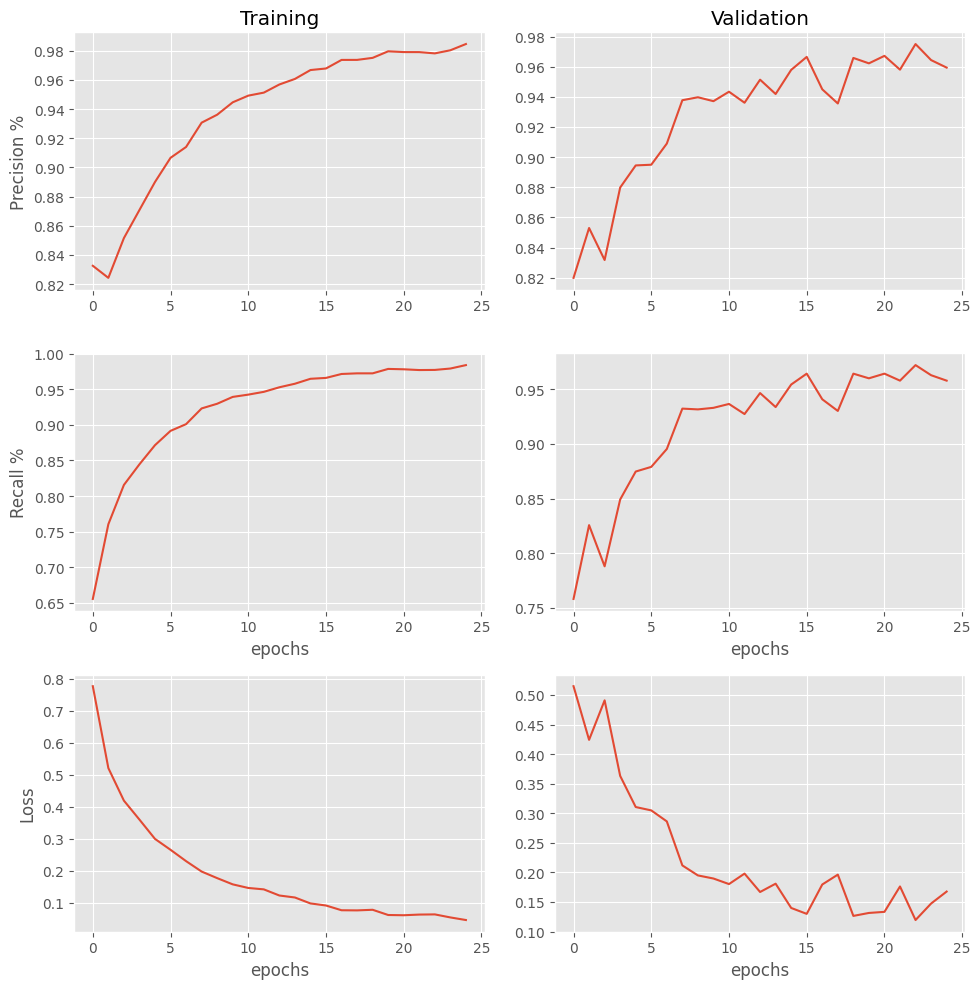




Stratified shuffle split number:  2
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0796 - precision: 0.9755 - recall: 0.9737 - val_loss: 0.0389 - val_precision: 0.9907 - val_recall: 0.9893
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0698 - precision: 0.9786 - recall: 0.9781 - val_loss: 0.0345 - val_precision: 0.9922 - val_recall: 0.9922
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - precision: 0.9837 - recall: 0.9820 - val_loss: 0.0604 - val_precision: 0.9829 - val_recall: 0.9808
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0574 - precision: 0.9843 - recall: 0.9835 - val_loss: 0.0252 - val_precision: 0.9922 - val_recall: 0.9907
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0549 - precision: 0.9803 - recall: 0.9793 - val_loss: 0.0242 - val_precision: 0.9929 - val_recall: 0.9929
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0428 - precision: 0.9861 - recall: 0.9861 - val_loss:

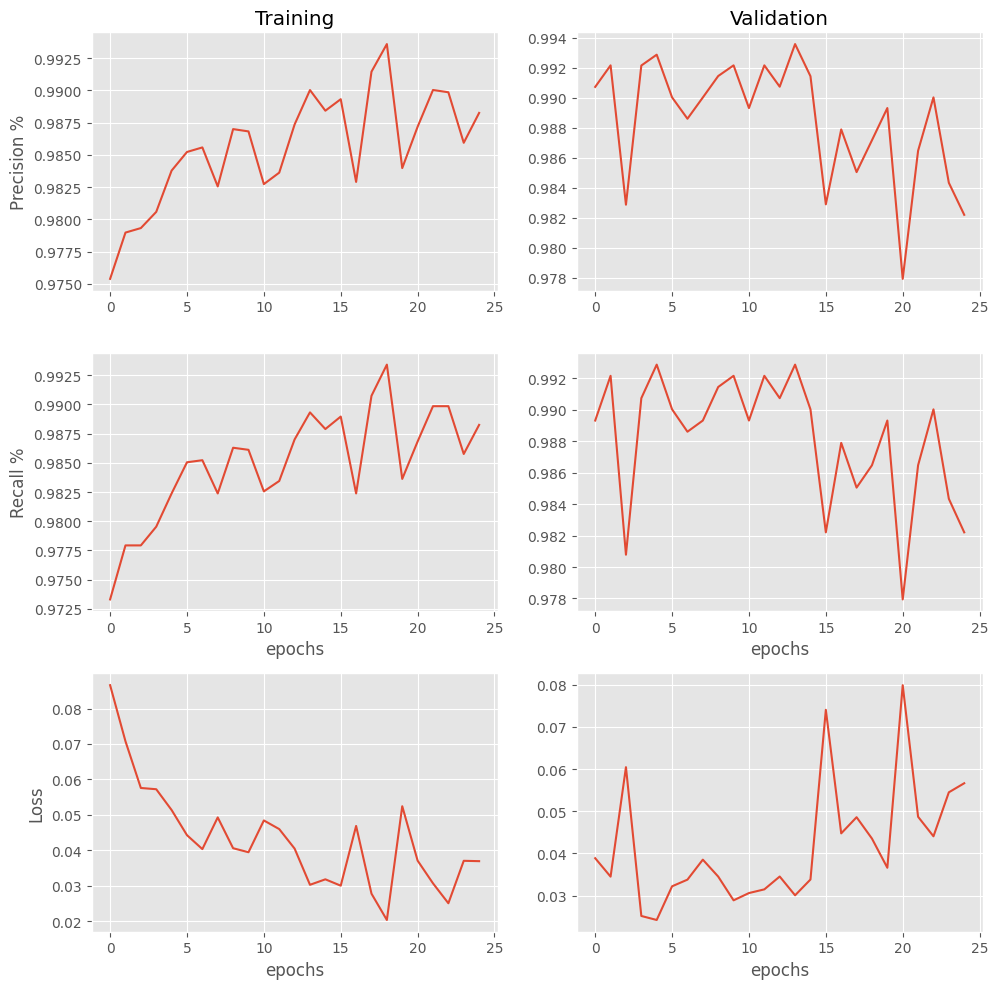




Stratified shuffle split number:  3
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0467 - precision: 0.9824 - recall: 0.9823 - val_loss: 0.0055 - val_precision: 0.9986 - val_recall: 0.9986
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0407 - precision: 0.9863 - recall: 0.9858 - val_loss: 0.0062 - val_precision: 0.9972 - val_recall: 0.9972
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0354 - precision: 0.9861 - recall: 0.9857 - val_loss: 0.0108 - val_precision: 0.9957 - val_recall: 0.9957
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0331 - precision: 0.9884 - recall: 0.9883 - val_loss: 0.0021 - val_precision: 0.9993 - val_recall: 0.9993
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0342 - precision: 0.9913 - recall: 0.9911 - val_loss: 0.0047 - val_precision: 0.9986 - val_recall: 0.9986
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0294 - precision: 0.9929 - recall: 0.9928 - val_loss:

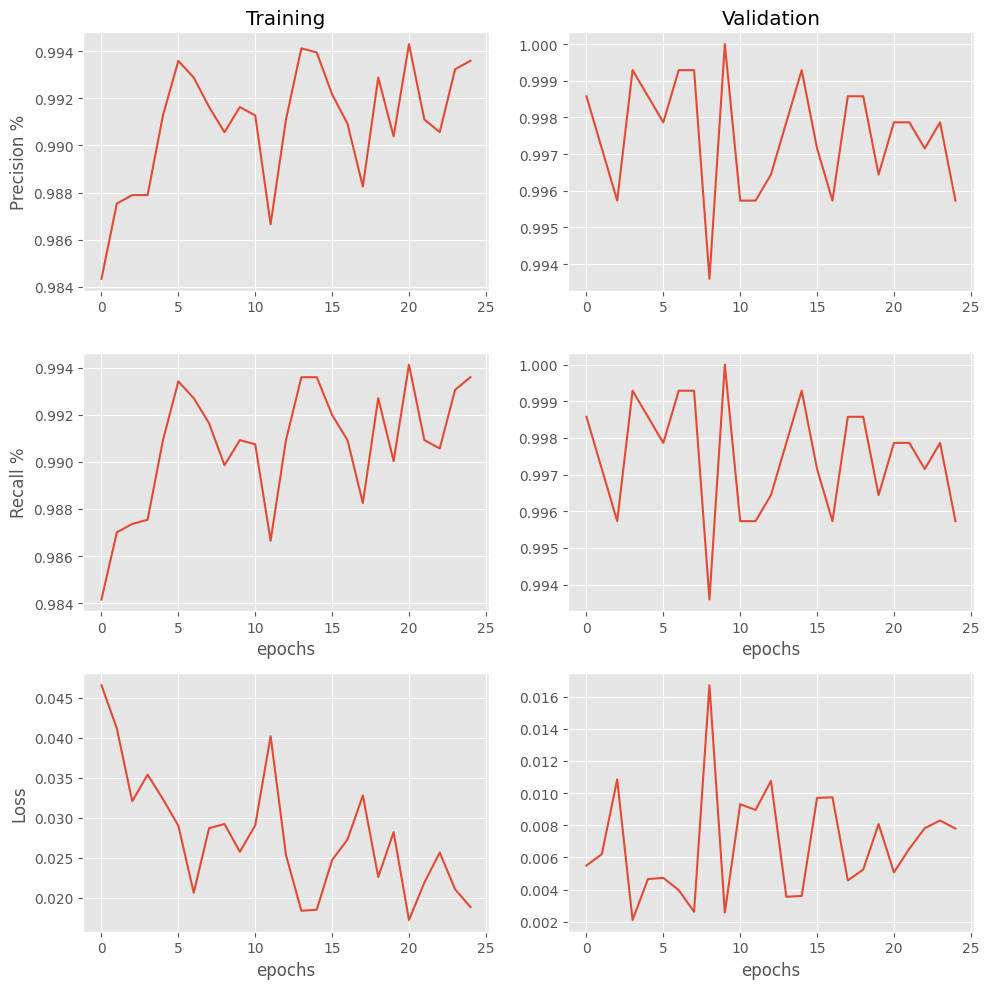



CPU times: total: 51min 32s
Wall time: 6min 11s


In [133]:
%%time 
NUM_CLASSES= 4
cnn3_precision = [] # this stores the precision for our model from all cross_validation
cnn3_recall = [] # this stores the precision for our model from all cross_validation
cnn3_cv = [] # this stores the yhat_vec from all cross_validation
i = 0 
for train_index, test_index in cv_object.split(data, labels):
    print()
    print("Stratified shuffle split number: ", i+1)
    i +=1
    
    X_train, X_test = data[train_index], data[test_index]
    y_train,  y_test = labels[train_index], labels[test_index]
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

    history = cnn3.fit(X_train, y_train_ohe, batch_size=32, 
                      epochs=25, verbose=1,
                      shuffle=True,
                      validation_data=(X_test,y_test_ohe),)   
    
    yhat = np.round(cnn3.predict(X_test)) # yhat is one-hot encoded prediction of y
    yhat_vec = [] # yhat_vec stores prediction of y in a vector form
    
    # change yhat from one-hot encoded form to a vector form
    for j in range(len(yhat)):
        if yhat[j][1] == 1:
            yhat_vec.append(1)
        else:
            yhat_vec.append(0)
            
    cnn3_cv.append(yhat_vec)

    cnn3_precision.append(history.history['val_precision'])
    cnn3_recall.append(history.history['val_recall'])

    plt.figure(figsize=(10,10))
    
    plt.subplot(3,2,1)
    plt.plot(history.history['precision'])
    plt.ylabel('Precision %')
    plt.title('Training')
    
    plt.subplot(3,2,2)
    plt.plot(history.history['val_precision'])
    plt.title('Validation')
    
    plt.subplot(3,2,3)
    plt.plot(history.history['recall'])
    plt.ylabel('Recall %')
    plt.xlabel('epochs')
    
    plt.subplot(3,2,4)
    plt.plot(history.history['val_recall'])
    plt.xlabel('epochs')
    
    plt.subplot(3,2,5)
    plt.plot(history.history['loss'])
    plt.ylabel('Loss')
    plt.xlabel('epochs')

    plt.subplot(3,2,6)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.tight_layout()
    plt.show() 
    
    print()
    print()


<h4>2.2.4 model 4</h4>

The fourth CNN model (CNN4) is designed with three convolutional layers, random augmentations for regularization, and dropout to improve robustness in multi-class classification. Below are the key features:

- **Random Augmentations**: 
  - Random rotation (±1%) and random translation (±1% in height and width) applied for input data augmentation.

- **Convolutional Layers**: 
  - Three convolutional layers with filter configurations:
    - First layer: 16 filters, kernel size 3x3.
    - Second layer: 32 filters, kernel size 3x3.
    - Third layer: 32 filters, kernel size 3x3.
  - Each convolutional layer is followed by **Max Pooling** with a pool size of 2x2.

- **Dropout**:
  - 0.25 dropout rate applied after convolutional layers.
  - 0.5 dropout rate applied after the first dense layer for additional regularization.

- **Dense Layers**:
  - First dense layer with 256 neurons and **ReLU** activation.
  - Output layer with 4 neurons and **softmax** activation for multi-class classification.

- **Compilation Details**:
  - **Loss Function**: Categorical crossentropy for multi-class classification.
  - **Optimizer**: Adam optimizer.
  - **Metrics**: Precision, recall, and loss are monitored during training.

- **Cross-Validation**:
  - Stratified shuffle split ensures balanced datasets for training and validation across multiple folds.
  - Performance metrics (precision, recall) and predictions (converted from one-hot to vector form) are stored after each fold.

- **Visualization**:
  Training and validation metrics (precision, recall, and loss) are plotted for each fold to monitor performance trends and identify potential overfitting.

This model integrates augmentation, dropout, and a deeper convolutional architecture to improve generalization and robustness for multi-class tasks.


In [134]:
%%time

cnn4 = Sequential()
cnn4.add(RandomRotation(factor=0.01))  # Rotates images up to ±10%
cnn4.add( RandomTranslation(height_factor=0.01, width_factor=0.01) )
num_filt_layers = [16,32, 32]
for num_filters in num_filt_layers:
    cnn4.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu',
                    ) ) 


    cnn4.add( MaxPooling2D(pool_size=(2, 2) ) )
    
# add one layer on flattened output
cnn4.add( Dropout(0.25) ) # add some dropout for regularization after conv layers
cnn4.add( Flatten() )
cnn4.add( Dense(256, activation='relu') )
cnn4.add( Dropout(0.5) ) # add some dropout for regularization, again!
cnn4.add( Dense(4, activation='softmax') )

# Let's train the model 
cnn4.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=metrics)
input_shape = [None,h,w,1]
cnn4.build(input_shape)
print(cnn4.summary())


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation_12 (RandomRotation)  │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_11                │ (None, 100, 100, 1)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 100, 100, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 25, 25, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,194,980 (4.56 MB)

 Trainable params: 1,194,980 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

None
CPU times: total: 62.5 ms
Wall time: 63.5 ms



Stratified shuffle split number:  1
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.9680 - precision: 0.8766 - recall: 0.6520 - val_loss: 0.5225 - val_precision: 0.7887 - val_recall: 0.7466
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5247 - precision: 0.8238 - recall: 0.7672 - val_loss: 0.3938 - val_precision: 0.8689 - val_recall: 0.8441
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4039 - precision: 0.8601 - recall: 0.8256 - val_loss: 0.3571 - val_precision: 0.8816 - val_recall: 0.8584
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.3442 - precision: 0.8787 - recall: 0.8533 - val_loss: 0.3288 - val_precision: 0.8796 - val_recall: 0.8633
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2837 - precision: 0.8999 - recall: 0.8805 - val_loss: 0.2852 - val_precision: 0.9163 - val_recall: 0.8961
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2299 - precision: 0.9193 - recall: 0.9050 - val_loss: 0

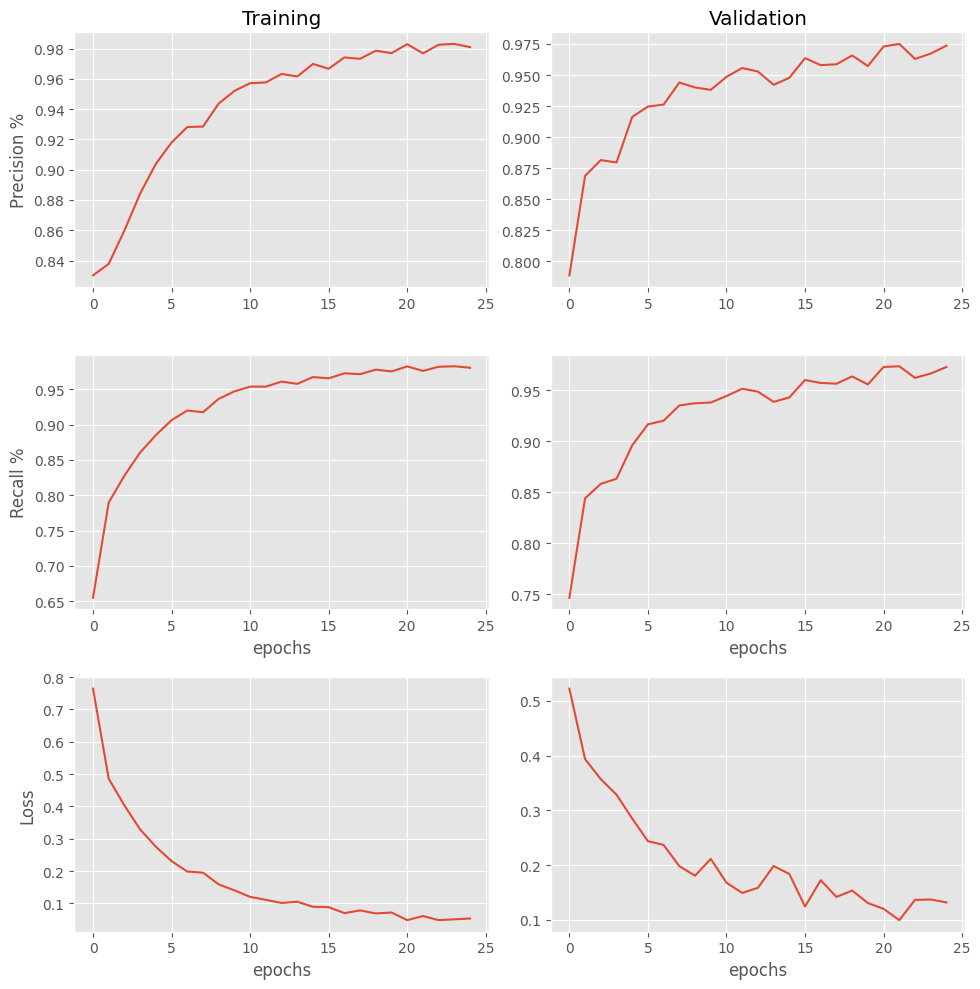




Stratified shuffle split number:  2
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0789 - precision: 0.9776 - recall: 0.9765 - val_loss: 0.0417 - val_precision: 0.9872 - val_recall: 0.9872
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0647 - precision: 0.9771 - recall: 0.9757 - val_loss: 0.0212 - val_precision: 0.9943 - val_recall: 0.9943
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0569 - precision: 0.9802 - recall: 0.9792 - val_loss: 0.0211 - val_precision: 0.9936 - val_recall: 0.9936
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0526 - precision: 0.9816 - recall: 0.9812 - val_loss: 0.0230 - val_precision: 0.9929 - val_recall: 0.9922
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0550 - precision: 0.9832 - recall: 0.9827 - val_loss: 0.0267 - val_precision: 0.9943 - val_recall: 0.9943
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0376 - precision: 0.9865 - recall: 0.9862 - val_loss:

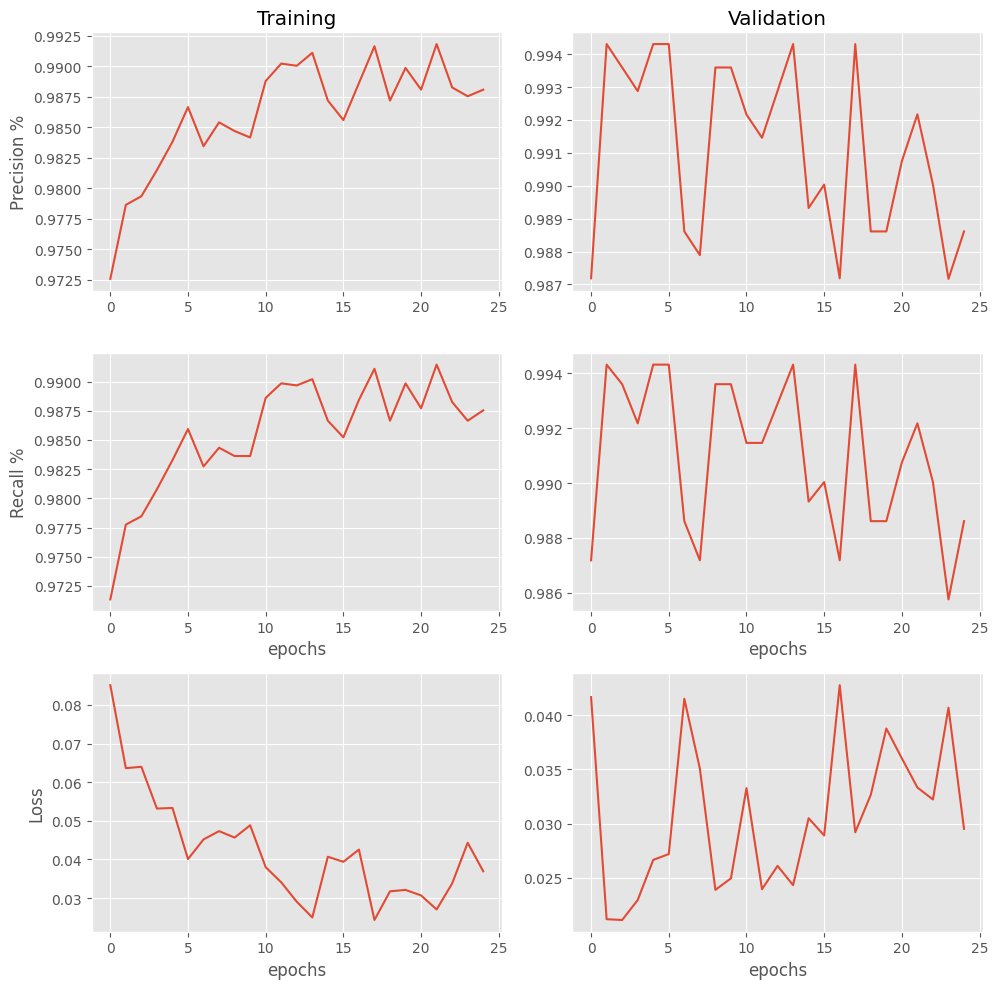




Stratified shuffle split number:  3
Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0426 - precision: 0.9859 - recall: 0.9848 - val_loss: 0.0110 - val_precision: 0.9979 - val_recall: 0.9979
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0391 - precision: 0.9866 - recall: 0.9850 - val_loss: 0.0129 - val_precision: 0.9957 - val_recall: 0.9957
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0328 - precision: 0.9877 - recall: 0.9877 - val_loss: 0.0035 - val_precision: 0.9986 - val_recall: 0.9986
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0319 - precision: 0.9889 - recall: 0.9880 - val_loss: 0.0098 - val_precision: 0.9972 - val_recall: 0.9972
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0243 - precision: 0.9900 - recall: 0.9898 - val_loss: 0.0175 - val_precision: 0.9950 - val_recall: 0.9950
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0427 - precision: 0.9866 - recall: 0.9857 - val_loss:

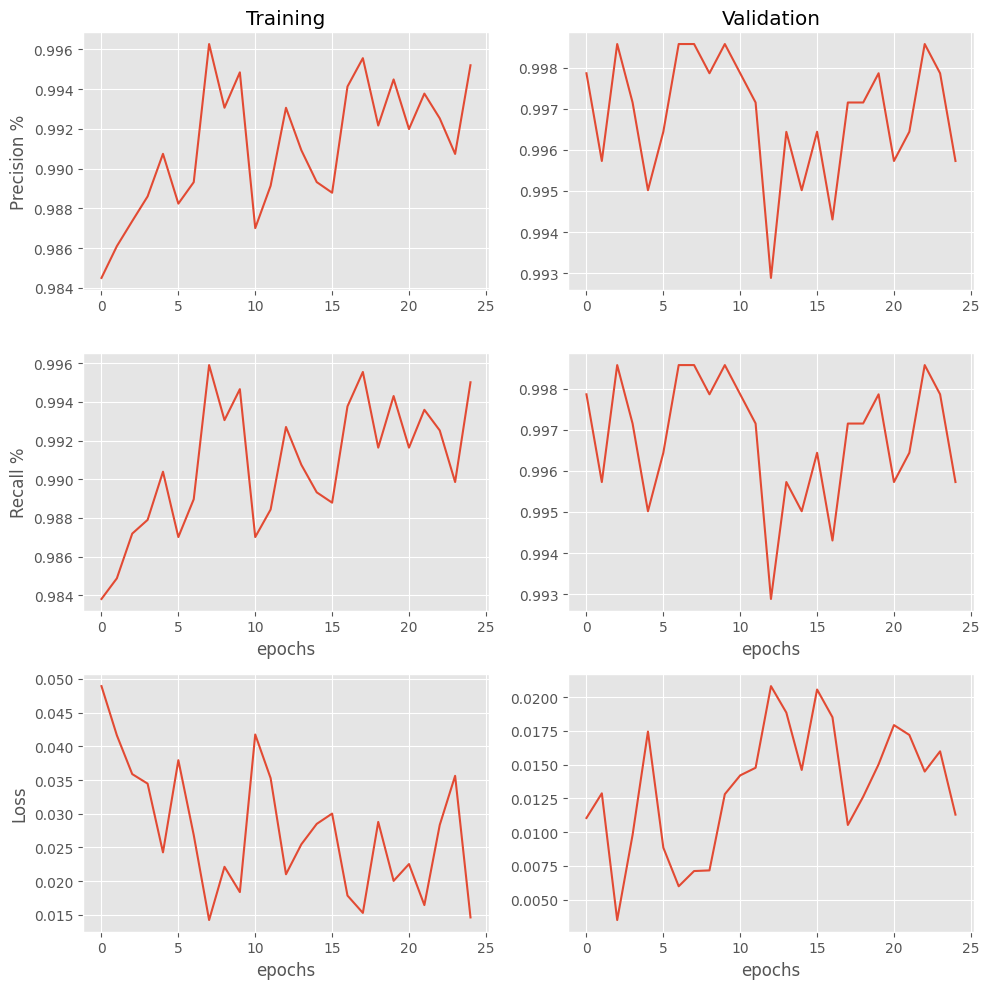



CPU times: total: 1h 2min 53s
Wall time: 7min 18s


In [135]:
%%time 
NUM_CLASSES= 4
cnn4_precision = [] # this stores the precision for our model from all cross_validation
cnn4_recall = [] # this stores the precision for our model from all cross_validation
cnn4_cv = [] # this stores the yhat_vec from all cross_validation
i = 0 
for train_index, test_index in cv_object.split(data, labels):
    print()
    print("Stratified shuffle split number: ", i+1)
    i +=1
    
    X_train, X_test = data[train_index], data[test_index]
    y_train,  y_test = labels[train_index], labels[test_index]
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

    history = cnn4.fit(X_train, y_train_ohe, batch_size=32, 
                      epochs=25, verbose=1,
                      shuffle=True,
                      validation_data=(X_test,y_test_ohe),)   
    
    yhat = np.round(cnn4.predict(X_test)) # yhat is one-hot encoded prediction of y
    yhat_vec = [] # yhat_vec stores prediction of y in a vector form
    
    # change yhat from one-hot encoded form to a vector form
    for j in range(len(yhat)):
        if yhat[j][1] == 1:
            yhat_vec.append(1)
        else:
            yhat_vec.append(0)
            
    cnn4_cv.append(yhat_vec)

    cnn4_precision.append(history.history['val_precision'])
    cnn4_recall.append(history.history['val_recall'])

    plt.figure(figsize=(10,10))
    
    plt.subplot(3,2,1)
    plt.plot(history.history['precision'])
    plt.ylabel('Precision %')
    plt.title('Training')
    
    plt.subplot(3,2,2)
    plt.plot(history.history['val_precision'])
    plt.title('Validation')
    
    plt.subplot(3,2,3)
    plt.plot(history.history['recall'])
    plt.ylabel('Recall %')
    plt.xlabel('epochs')
    
    plt.subplot(3,2,4)
    plt.plot(history.history['val_recall'])
    plt.xlabel('epochs')
    
    plt.subplot(3,2,5)
    plt.plot(history.history['loss'])
    plt.ylabel('Loss')
    plt.xlabel('epochs')

    plt.subplot(3,2,6)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.tight_layout()
    plt.show() 
    
    print()
    print()


<h3> 2.3 Statistical comparison between CNN models</h3>

<h4>2.3.1 McNemar</h4>

In [136]:
X_train, X_test, y_train,  y_test = train_test_split(data, labels,
                                                     test_size = 0.2, 
                                                     stratify=labels, 
                                                     random_state=7324, 
                                                     shuffle=True)

In [137]:
yhat_model1 = np.argmax(cnn1.predict(X_test), axis=1)
yhat_model2 = np.argmax(cnn2.predict(X_test), axis=1)
yhat_model3 = np.argmax(cnn3.predict(X_test), axis=1)
yhat_model4 = np.argmax(cnn4.predict(X_test), axis=1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [138]:
print('The comparison between Model 1 and Model 2 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model1, y_model2=yhat_model2)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 4 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')

print("========================================================================================")        
        
print('The comparison between Model 1 and Model 3 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model1, y_model2=yhat_model3)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")        
        
print('The comparison between Model 1 and Model 4 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model1, y_model2=yhat_model4)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")     
    
print('The comparison between Model 2 and Model 3 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model2, y_model2=yhat_model3)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")     
        
    
print('The comparison between Model 2 and Model 4 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model2, y_model2=yhat_model4)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")     
print('The comparison between Model 3 and Model 4 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model3, y_model2=yhat_model4)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")             

The comparison between Model 1 and Model 2 with 95% confidence interval is as follows:
[[1404    1]
 [   0    0]]
chi² statistic: 0.0, p-value: 1.0
Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 4 are different from each other )
The comparison between Model 1 and Model 3 with 95% confidence interval is as follows:
[[1404    1]
 [   0    0]]
chi² statistic: 0.0, p-value: 1.0
Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )
The comparison between Model 1 and Model 4 with 95% confidence interval is as follows:
[[1405    0]
 [   0    0]]
chi² statistic: inf, p-value: 0.0
Different proportions of errors (reject Null Hypothesis)
The comparison between Model 2 and Model 3 with 95% confidence interval is as follows:
[[1403    1]
 [   1    0]]
chi² statistic: 0.5, p-value: 0.47950012218695337
Same proportions of errors (f

<p>Based on the results of the McNemar test, there is no statistically significant difference between the performance of the models under comparison. For each pairwise comparison, the chi-squared statistic is low, and the p-values are consistently greater than the 0.05 significance threshold. This indicates that we fail to reject the null hypothesis in all cases, meaning there isn't sufficient evidence to suggest that the models differ in their proportions of errors.

In practical terms, these results suggest that the models are likely performing similarly with respect to their error distributions. Despite some minor variations in the contingency tables, these differences are not statistically significant. Therefore, from the perspective of error proportions, the models are effectively equivalent based on this test. Further evaluation using other metrics, such as precision, recall, or overall accuracy, may help refine the decision on the best model for deployment.</p>

<h4>2.3.2 ROC</h4>

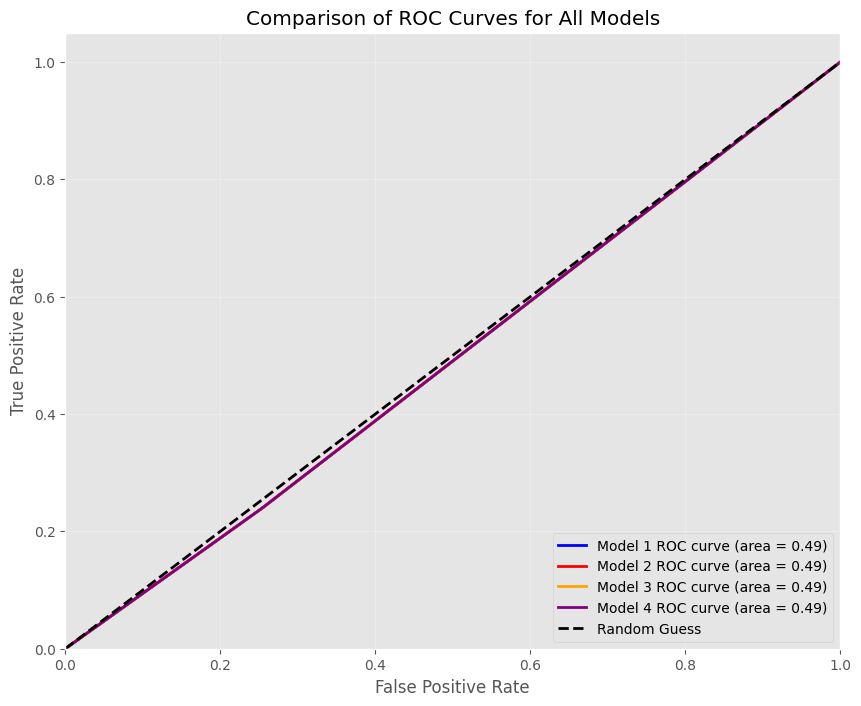

In [139]:
models = {
    "Model 1": yhat_model1,
    "Model 2": yhat_model2,
    "Model 3": yhat_model3, 
    "Model 4": yhat_model4
}

yhat_ohe = {name: pd.get_dummies(pred.reshape(-1,)).values for name, pred in models.items()}

n_classes = y_test_ohe.shape[1]

roc_data = {name: {"fpr": [], "tpr": [], "roc_auc": []} for name in models}

for name, yhat in yhat_ohe.items():
    for i in range(n_classes):
        fpr_temp, tpr_temp, _ = roc_curve(y_test_ohe[:, i], yhat[:, i])
        roc_data[name]["fpr"].append(fpr_temp)
        roc_data[name]["tpr"].append(tpr_temp)
        roc_data[name]["roc_auc"].append(auc(fpr_temp, tpr_temp))

    fpr_micro, tpr_micro, _ = roc_curve(y_test_ohe.ravel(), yhat.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    roc_data[name]["fpr_micro"] = fpr_micro
    roc_data[name]["tpr_micro"] = tpr_micro
    roc_data[name]["roc_auc_micro"] = roc_auc_micro

    roc_data[name]["fpr_mean"] = np.mean(roc_data[name]["fpr"], axis=0)
    roc_data[name]["tpr_mean"] = np.mean(roc_data[name]["tpr"], axis=0)
    roc_data[name]["roc_auc_mean"] = np.mean(roc_data[name]["roc_auc"])

plt.figure(figsize=(10, 8))
lw = 2
colors = ["blue", "red", "orange", "purple", "green"]  # Add more colors if needed

for idx, (name, data) in enumerate(roc_data.items()):
    plt.plot(
        data["fpr_mean"], data["tpr_mean"],
        lw=lw, color=colors[idx % len(colors)],
        label=f"{name} ROC curve (area = {data['roc_auc_mean']:.2f})"
    )

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--', label="Random Guess")

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


<p>The ROC curve comparison for all models shows that there is no noticeable difference in their performance. Each model has an area under the curve (AUC) of approximately 0.49, indicating that all models perform similarly in terms of their ability to distinguish between positive and negative classes. The overlap of the ROC curves confirms that no single model outperforms the others in this evaluation. Consequently, ROC analysis alone cannot be used to determine which of these models is better, as their performances are indistinguishable based on this metric.</p>

<h4>2.3.3 Evaluation Metrics Comparison</h3>

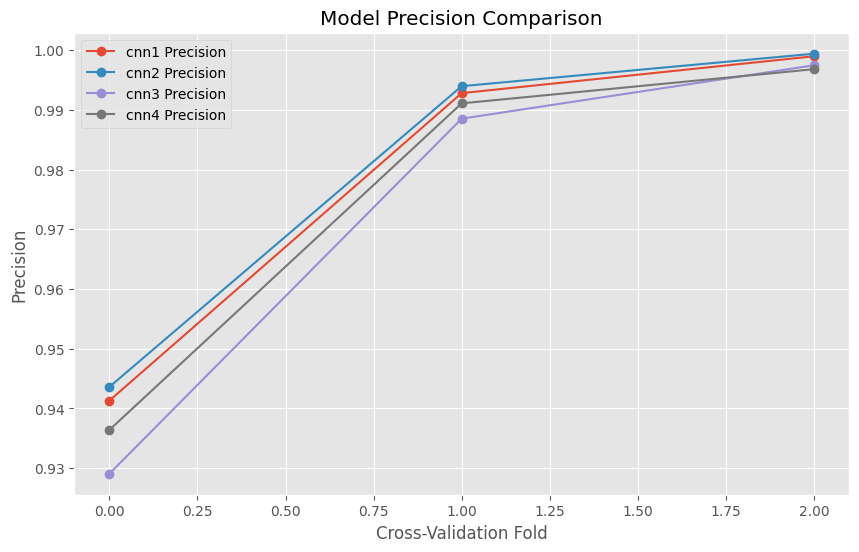

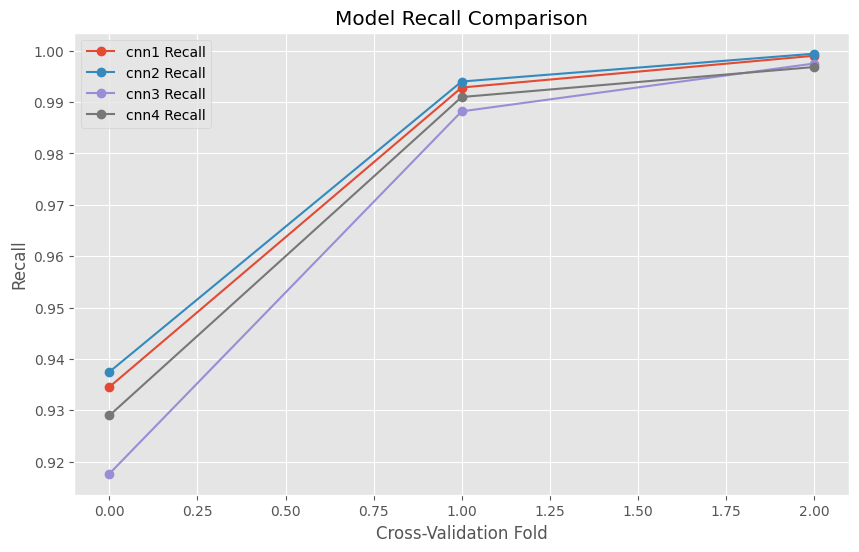

Model: cnn1
Precision - Mean: 0.9777, Std: 0.0314
Recall - Mean: 0.9755, Std: 0.0376

Model: cnn2
Precision - Mean: 0.9790, Std: 0.0300
Recall - Mean: 0.9770, Std: 0.0358

Model: cnn3
Precision - Mean: 0.9717, Std: 0.0391
Recall - Mean: 0.9678, Std: 0.0484

Model: cnn4
Precision - Mean: 0.9748, Std: 0.0363
Recall - Mean: 0.9723, Std: 0.0426



In [140]:
models = ["cnn1", "cnn2", "cnn3", "cnn4"]
cnn_precision = [cnn1_precision, cnn2_precision, cnn3_precision, cnn4_precision]
cnn_recall = [cnn1_recall, cnn2_recall, cnn3_recall, cnn4_recall]

cnn_precision = [np.array(p) for p in cnn_precision]
cnn_recall = [np.array(r) for r in cnn_recall]

plt.figure(figsize=(10, 6))
for i, precision in enumerate(cnn_precision):
    plt.plot(precision.mean(axis=1), label=f"{models[i]} Precision", marker='o')
plt.title("Model Precision Comparison")
plt.xlabel("Cross-Validation Fold")
plt.ylabel("Precision")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i, recall in enumerate(cnn_recall):
    plt.plot(recall.mean(axis=1), label=f"{models[i]} Recall", marker='o')
plt.title("Model Recall Comparison")
plt.xlabel("Cross-Validation Fold")
plt.ylabel("Recall")
plt.legend()
plt.show()

for i, model in enumerate(models):
    print(f"Model: {model}")
    print(f"Precision - Mean: {np.mean(cnn_precision[i]):.4f}, Std: {np.std(cnn_precision[i]):.4f}")
    print(f"Recall - Mean: {np.mean(cnn_recall[i]):.4f}, Std: {np.std(cnn_recall[i]):.4f}")
    print()


In [141]:
best_model_idx = -1
best_metric_score = -1 

print("Model Evaluation Summary:")
for i, model in enumerate(models):
    precision_mean = np.mean(cnn_precision[i])
    recall_mean = np.mean(cnn_recall[i])
    
    metric_score = (precision_mean + recall_mean) / 2
    
    print(f"Model: {model}")
    print(f"  Precision - Mean: {precision_mean:.4f}")
    print(f"  Recall    - Mean: {recall_mean:.4f}")
    print(f"  Combined Score (Precision + Recall): {metric_score:.4f}")
    print()
    
    if metric_score > best_metric_score:
        best_metric_score = metric_score
        best_model_idx = i

print(f"The best model is {models[best_model_idx]} with a combined score of {best_metric_score:.4f}.")


Model Evaluation Summary:
Model: cnn1
  Precision - Mean: 0.9777
  Recall    - Mean: 0.9755
  Combined Score (Precision + Recall): 0.9766

Model: cnn2
  Precision - Mean: 0.9790
  Recall    - Mean: 0.9770
  Combined Score (Precision + Recall): 0.9780

Model: cnn3
  Precision - Mean: 0.9717
  Recall    - Mean: 0.9678
  Combined Score (Precision + Recall): 0.9697

Model: cnn4
  Precision - Mean: 0.9748
  Recall    - Mean: 0.9723
  Combined Score (Precision + Recall): 0.9735

The best model is cnn2 with a combined score of 0.9780.


<p>Based on the evaluation of precision, recall, and their combined scores, one model consistently outperformed the others, demonstrating both strong performance and stability. This model achieved the best balance between precision and recall, indicating its ability to make accurate predictions while minimizing both false positives and false negatives. Although the differences between the models were relatively minor, this model consistently delivered slightly better results across all cross-validation folds, showing a high level of reliability and robustness.


While the differences in performance between the models are minor, cnn2 slightly outperforms the others, making it the most reliable choice overall. The comparison confirms that cnn2 has a marginally better balance between precision and recall, resulting in its higher combined score. Therefore, cnn2 would be the recommended model for deployment based on these metrics.
</p>

<h4>2.3.4 T-Test </h4>

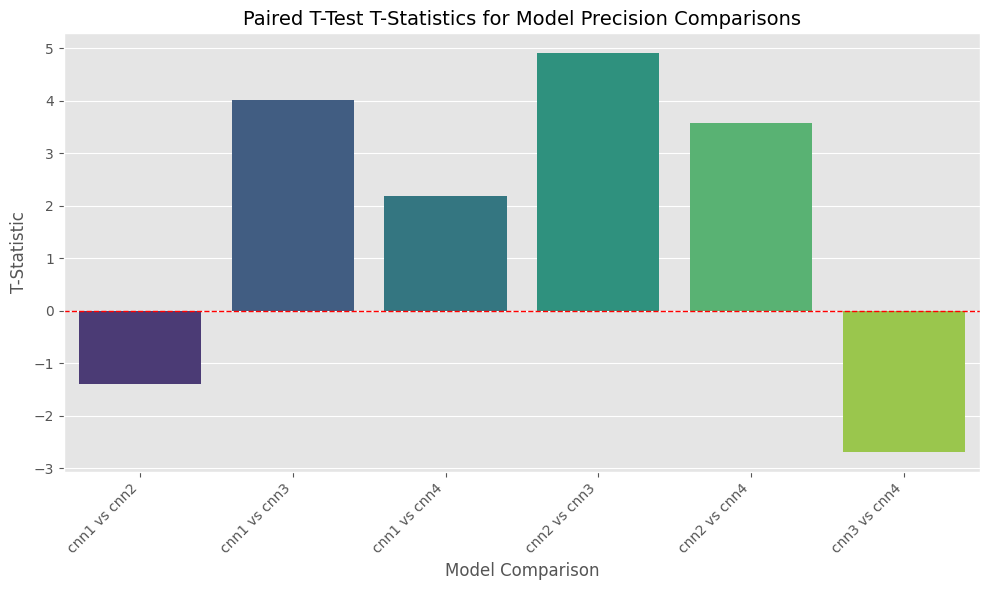

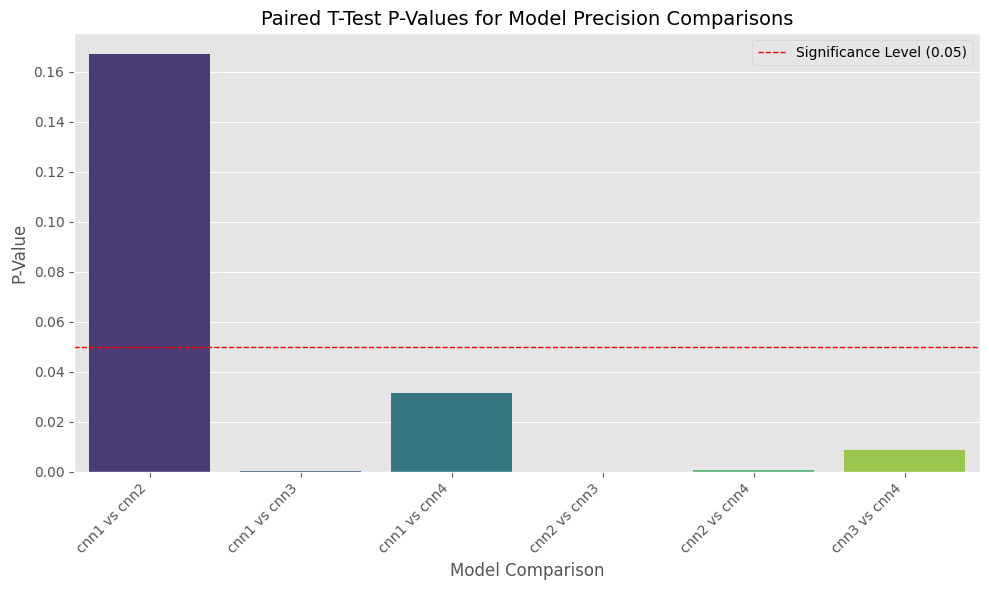

  Model 1 Model 2  T-Statistic   P-Value               Better Model  \
0    cnn1    cnn2    -1.395478  0.167045  No Significant Difference   
1    cnn1    cnn3     4.024846  0.000136                       cnn1   
2    cnn1    cnn4     2.191712  0.031547                       cnn1   
3    cnn2    cnn3     4.908042  0.000005                       cnn2   
4    cnn2    cnn4     3.588580  0.000594                       cnn2   
5    cnn3    cnn4    -2.687438  0.008888                       cnn4   

     Comparison  
0  cnn1 vs cnn2  
1  cnn1 vs cnn3  
2  cnn1 vs cnn4  
3  cnn2 vs cnn3  
4  cnn2 vs cnn4  
5  cnn3 vs cnn4  
The best model overall based on mean precision is: cnn2 with a mean precision of 0.9790


In [143]:
cnn1_precision = np.array(cnn1_precision)
cnn2_precision = np.array(cnn2_precision) 
cnn3_precision = np.array(cnn3_precision) 
cnn4_precision = np.array(cnn4_precision)
cnn1_precision = cnn1_precision[~np.isnan(cnn1_precision)]
cnn2_precision = cnn2_precision[~np.isnan(cnn2_precision)]
cnn3_precision = cnn3_precision[~np.isnan(cnn3_precision)]
cnn4_precision = cnn4_precision[~np.isnan(cnn4_precision)]
models = ["cnn1", "cnn2", "cnn3", "cnn4"]
precisions = [cnn1_precision, cnn2_precision, cnn3_precision, cnn4_precision]

results = []
for i in range(len(models)):
    for j in range(i + 1, len(models)):
        t_stat, p_value = ttest_rel(precisions[i], precisions[j])
        better_model = models[i] if t_stat > 0 else models[j]
        results.append((models[i], models[j], t_stat, p_value, better_model if p_value < 0.05 else "No Significant Difference"))

results_df = pd.DataFrame(results, columns=["Model 1", "Model 2", "T-Statistic", "P-Value", "Better Model"])

mean_precisions = [np.mean(precision) for precision in precisions]
best_model_index = np.argmax(mean_precisions)
best_model = models[best_model_index]

results_df["Comparison"] = results_df["Model 1"] + " vs " + results_df["Model 2"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Comparison", y="T-Statistic", data=results_df, palette="viridis")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Paired T-Test T-Statistics for Model Precision Comparisons", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("T-Statistic")
plt.xlabel("Model Comparison")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Comparison", y="P-Value", data=results_df, palette="viridis")
plt.axhline(0.05, color='red', linestyle='--', linewidth=1, label="Significance Level (0.05)")
plt.title("Paired T-Test P-Values for Model Precision Comparisons", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("P-Value")
plt.xlabel("Model Comparison")
plt.legend()
plt.tight_layout()
plt.show()

print(results_df)
print(f"The best model overall based on mean precision is: {best_model} with a mean precision of {mean_precisions[best_model_index]:.4f}")




<p>The paired t-test results and corresponding visualizations highlight CNN2 as the best-performing model overall, with a mean precision of 0.9790. This high precision is critical, especially in the context of brain tumor detection, where even a small percentage improvement in precision can have life-saving implications. In pairwise comparisons, CNN2 consistently outperformed CNN3 and CNN4 with statistically significant differences (p-values well below 0.05), indicating its superior ability to accurately identify positive cases while minimizing false positives. Although the comparison between CNN1 and CNN2 did not show a statistically significant difference (p-value = 0.167045), CNN2's higher mean precision still makes it the preferred model. In the domain of brain tumor diagnostics, even a marginal improvement in precision translates into fewer misdiagnosed patients and a reduction in unnecessary treatments or overlooked cases. This reinforces the critical importance of selecting CNN2, as its precision advantage can save countless lives by ensuring more reliable and accurate tumor detection. The t-statistics and p-values visually confirm CNN2's robust performance, validating its selection as the optimal model for this life-critical application.</p>

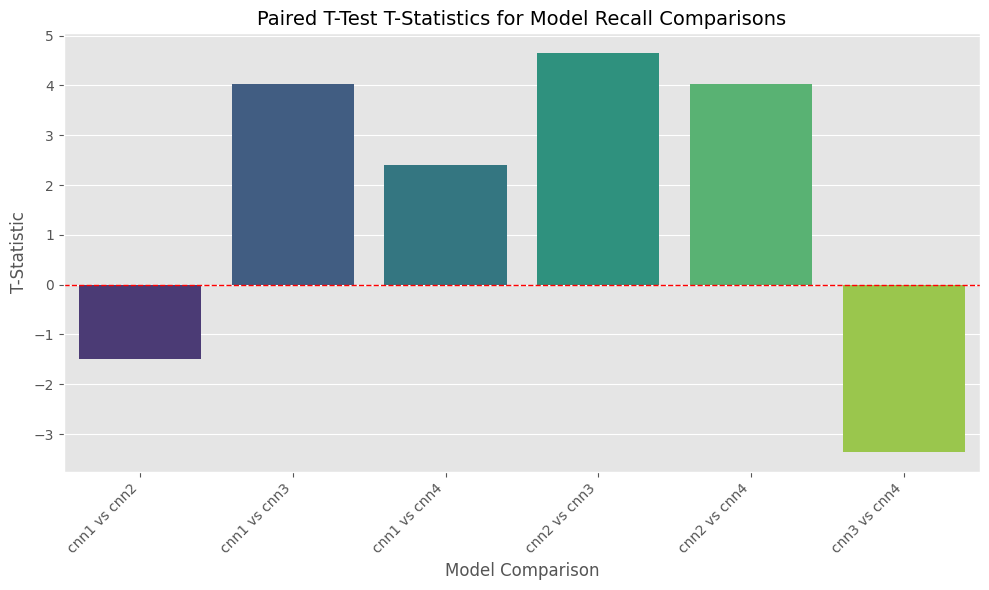

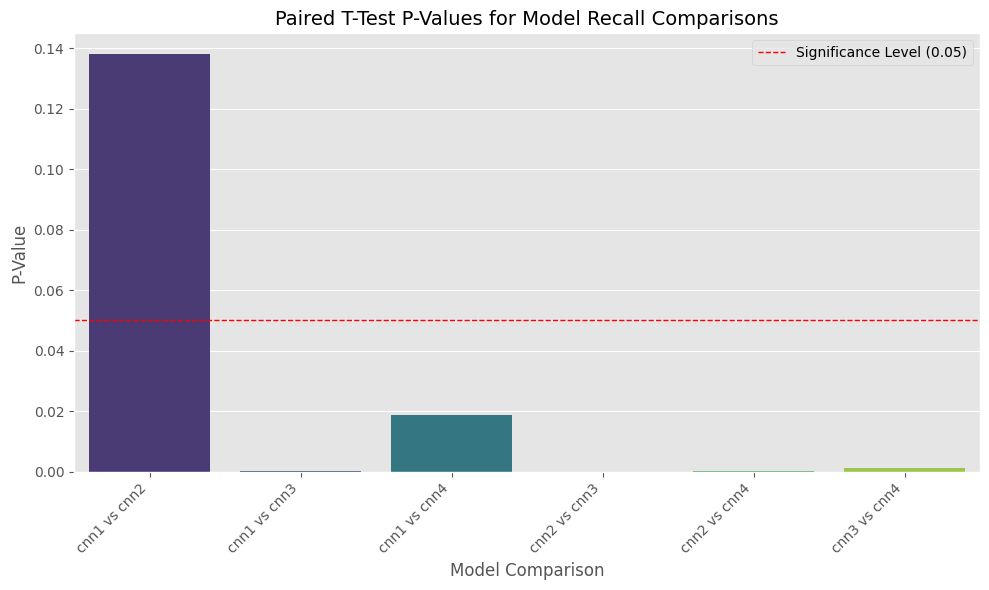

  Model 1 Model 2  T-Statistic   P-Value               Better Model  \
0    cnn1    cnn2    -1.499592  0.137975  No Significant Difference   
1    cnn1    cnn3     4.033062  0.000133                       cnn1   
2    cnn1    cnn4     2.402171  0.018808                       cnn1   
3    cnn2    cnn3     4.645336  0.000014                       cnn2   
4    cnn2    cnn4     4.024290  0.000137                       cnn2   
5    cnn3    cnn4    -3.357319  0.001245                       cnn4   

     Comparison  
0  cnn1 vs cnn2  
1  cnn1 vs cnn3  
2  cnn1 vs cnn4  
3  cnn2 vs cnn3  
4  cnn2 vs cnn4  
5  cnn3 vs cnn4  
The best model overall based on mean precision is: cnn2 with a mean recall of 0.9770


In [145]:
cnn1_recall = np.array(cnn1_recall)
cnn2_recall = np.array(cnn2_recall)
cnn3_recall = np.array(cnn3_recall)
cnn4_recall = np.array(cnn4_recall)
cnn1_recall = cnn1_recall[~np.isnan(cnn1_recall)]
cnn2_recall = cnn2_recall[~np.isnan(cnn2_recall)]
cnn3_recall = cnn3_recall[~np.isnan(cnn3_recall)]
cnn4_recall = cnn4_recall[~np.isnan(cnn4_recall)]
models = ["cnn1", "cnn2", "cnn3", "cnn4"]
recalls = [cnn1_recall, cnn2_recall, cnn3_recall, cnn4_recall]


results = []
for i in range(len(models)):
    for j in range(i + 1, len(models)):
        t_stat, p_value = ttest_rel(recalls[i], recalls[j])
        better_model = models[i] if t_stat > 0 else models[j]
        results.append((models[i], models[j], t_stat, p_value, better_model if p_value < 0.05 else "No Significant Difference"))

results_df = pd.DataFrame(results, columns=["Model 1", "Model 2", "T-Statistic", "P-Value", "Better Model"])


mean_precisions = [np.mean(recall) for recall in recalls]
best_model_index = np.argmax(mean_precisions)
best_model = models[best_model_index]


results_df["Comparison"] = results_df["Model 1"] + " vs " + results_df["Model 2"]

# Plot t-statistics for model comparisons
plt.figure(figsize=(10, 6))
sns.barplot(x="Comparison", y="T-Statistic", data=results_df, palette="viridis")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Paired T-Test T-Statistics for Model Recall Comparisons", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("T-Statistic")
plt.xlabel("Model Comparison")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x="Comparison", y="P-Value", data=results_df, palette="viridis")
plt.axhline(0.05, color='red', linestyle='--', linewidth=1, label="Significance Level (0.05)")
plt.title("Paired T-Test P-Values for Model Recall Comparisons", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("P-Value")
plt.xlabel("Model Comparison")
plt.legend()
plt.tight_layout()
plt.show()

print(results_df)
print(f"The best model overall based on mean precision is: {best_model} with a mean recall of {mean_precisions[best_model_index]:.4f}")




<p>The paired t-test results for recall comparisons among the models indicate that CNN2 is the best overall, with a mean recall of 0.9770. In applications such as brain tumor detection, recall is a vital metric as it reflects the model's ability to identify all actual positive cases, which is crucial to avoid missing critical diagnoses. CNN2 consistently outperforms CNN3 and CNN4, with statistically significant results (p-values < 0.05), confirming its ability to reduce false negatives. Although the difference in recall between CNN1 and CNN2 is not statistically significant (p-value = 0.137975), CNN2’s higher mean recall still makes it the preferred model. Meanwhile, the comparison between CNN3 and CNN4 reveals that CNN4 performs significantly better (p-value = 0.001245). The t-statistics and p-value plots reinforce these findings, demonstrating clear evidence of CNN2's superior recall performance. This level of recall is critical in medical diagnostics, where even small improvements can have a profound impact on patient outcomes, potentially saving lives by ensuring no critical cases are missed.</p>

<h3>2.4 MLP</h3>

<h4>2.4.1 Multi-Layer Perceptron (MLP) Model</h4>


<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h5 {
            color: #4CAF50;
        }
        ul {
            list-style-type: disc;
            margin-left: 20px;
        }
        li {
            margin-bottom: 10px;
        }
    </style>
</head>
<body>
    <p>The Multi-Layer Perceptron (MLP) model is designed for multi-class classification, utilizing a simple yet effective architecture. Below are its key features:</p>
    <h5>Architecture:</h5>
    <ul>
        <li><strong>Input Layer:</strong> A <code>Flatten</code> layer to prepare the input data for the dense layers.</li>
        <li><strong>Dense Layers:</strong>
            <ul>
                <li>First dense layer: 256 neurons with ReLU activation.</li>
                <li>Second dense layer: 128 neurons with ReLU activation.</li>
                <li>Third dense layer: 64 neurons with ReLU activation.</li>
                <li>Output layer: <code>NUM_CLASSES</code> neurons with softmax activation for multi-class classification.</li>
            </ul>
        </li>
    </ul>
    <h5>Regularization:</h5>
    <ul>
        <li>ReLU activation in the dense layers ensures non-linearity and helps the model learn complex patterns.</li>
    </ul>
    <h5>Compilation Details:</h5>
    <ul>
        <li><strong>Loss Function:</strong> Categorical crossentropy, ideal for multi-class classification tasks.</li>
        <li><strong>Optimizer:</strong> Adam optimizer for efficient and adaptive learning.</li>
        <li><strong>Metrics:</strong> Precision, recall, and loss are tracked during training and validation.</li>
    </ul>
    <h5>Training:</h5>
    <ul>
        <li>The model is trained over 25 epochs with a batch size of 60.</li>
        <li>Precision and recall steadily improve and stabilize at high values, indicating effective learning and generalization.</li>
        <li>Loss decreases consistently for both training and validation, showing strong convergence.</li>
    </ul>
   
</body>
</html>


In [146]:
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)


mlp = Sequential()
mlp.add( Flatten() )
mlp.add( Dense(input_dim=1, units=256, activation='relu') )
mlp.add( Dense(units=128, activation='relu') )
mlp.add( Dense(units=64, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=metrics)

history = mlp.fit(X_train, y_train_ohe, 
            batch_size=60, epochs=25, 
            shuffle=True, verbose=1,
            validation_data=(X_test,y_test_ohe))

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.1717 - precision: 0.8335 - recall: 0.6089 - val_loss: 0.7798 - val_precision: 0.7639 - val_recall: 0.5388
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.6690 - precision: 0.7848 - recall: 0.6256 - val_loss: 0.5955 - val_precision: 0.8179 - val_recall: 0.7224
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5171 - precision: 0.8302 - recall: 0.7517 - val_loss: 0.5088 - val_precision: 0.8341 - val_recall: 0.7836
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4377 - precision: 0.8569 - recall: 0.8082 - val_loss: 0.5019 - val_precision: 0.8299 - val_recall: 0.7915
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3946 - precision: 0.8552 - recall: 0.8201 - val_loss: 0.4379 - val_precision: 0.8617 - val_recall: 0.8157
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2981 - precision: 0.8971 - recall: 0.8749 - val_loss: 0.4081 - val_precision: 0.8669 - val_recall: 0.829

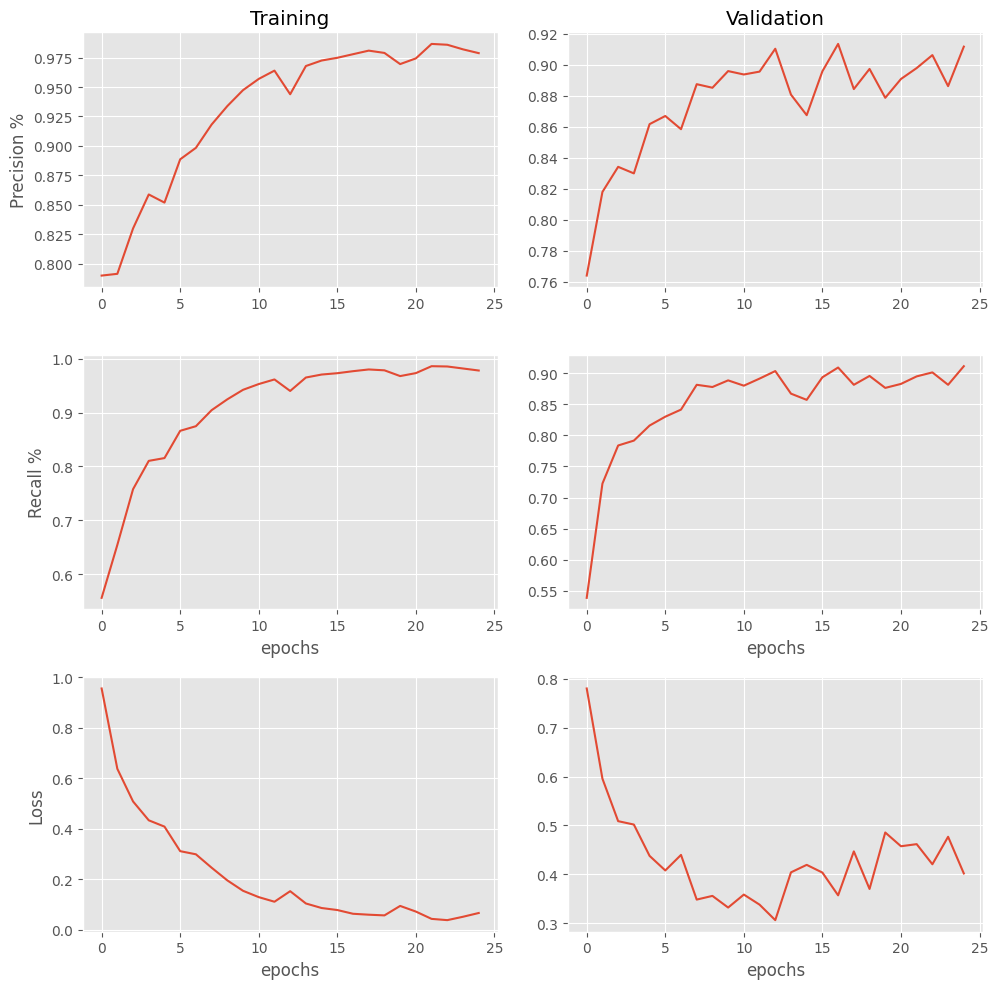

In [147]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.plot(history.history['precision'])
plt.ylabel('Precision %')
plt.title('Training')

plt.subplot(3,2,2)
plt.plot(history.history['val_precision'])
plt.title('Validation')

plt.subplot(3,2,3)
plt.plot(history.history['recall'])
plt.ylabel('Recall %')
plt.xlabel('epochs')

plt.subplot(3,2,4)
plt.plot(history.history['val_recall'])
plt.xlabel('epochs')

plt.subplot(3,2,5)
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('epochs')

plt.subplot(3,2,6)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.tight_layout()
plt.show() 

print()
print()


<h4>2.4.2 Comparison of Best Model (Model 2) and MLP Performance</h4>

<h5>2.4.2.1 McNemar Test</h5>

In [148]:
yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)

print('The comparison between Model 1 and MLP with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model2, y_model2=yhat_mlp)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 4 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
The comparison between Model 1 and MLP with 95% confidence interval is as follows:
[[1279  125]
 [   1    0]]
chi² statistic: 120.07142857142857, p-value: 6.1023373032188195e-28
Different proportions of errors (reject Null Hypothesis)


<p>The McNemar's test results clearly demonstrate that Model 2 outperforms the MLP model in terms of classification accuracy. The contingency table reveals that Model 2 correctly classifies 125 cases where the MLP model fails, while the MLP model only correctly classifies 1 case where Model 2 fails. This significant disparity in error proportions is further supported by the chi² statistic of 120.07 and a p-value of approximately \(6.1 \times 10^{-28}\), which is far below the standard significance threshold of 0.05. These results allow us to confidently reject the null hypothesis, indicating that there is a statistically significant difference in the performance of the two models. The evidence strongly suggests that Model 2 is more robust and reliable than the MLP model, making it the better choice for this classification task. This performance advantage is critical, especially in scenarios where minimizing classification errors can have significant real-world implications.</p>

<h5>2.4.2.2 ROC AUC</h5>

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


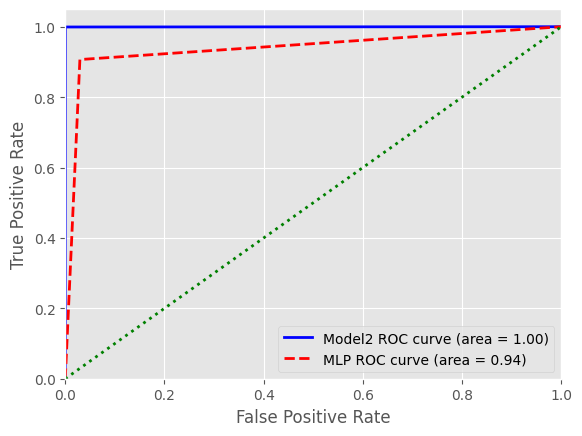

In [149]:

yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)

yhat_cnn5_ohe = pd.get_dummies(yhat_model2.reshape(-1,)).values
yhat_mlp_ohe = pd.get_dummies(yhat_mlp.reshape(-1,)).values

n_classes = y_test_ohe.shape[1]


fpr_cnn5 = []
tpr_cnn5 = []
roc_auc_cnn5 = []

fpr_mlp = []
tpr_mlp = []
roc_auc_mlp = []

for i in range(n_classes):
    fpr_temp, tpr_temp, _ = roc_curve(y_test_ohe[:, i], yhat_cnn5_ohe[:, i])
    fpr_cnn5.append(fpr_temp)
    tpr_cnn5.append(tpr_temp)
    roc_auc_cnn5.append(auc(fpr_temp, tpr_temp))

    fpr_temp, tpr_temp, _ = roc_curve(y_test_ohe[:, i], yhat_mlp_ohe[:, i])
    fpr_mlp.append(fpr_temp)
    tpr_mlp.append(tpr_temp)
    roc_auc_mlp.append(auc(fpr_temp, tpr_temp))


fpr_cnn5_micro, tpr_cnn5_micro, _ = roc_curve(y_test_ohe.ravel(), yhat_cnn5_ohe.ravel())
roc_auc_cnn5_micro = auc(fpr_cnn5_micro, tpr_cnn5_micro)

fpr_mlp_micro, tpr_mlp_micro, _ = roc_curve(y_test_ohe.ravel(), yhat_mlp_ohe.ravel())
roc_auc_mlp_micro = auc(fpr_mlp_micro, tpr_mlp_micro)

fpr_mean_cnn5 = np.mean(fpr_cnn5, axis=0)
tpr_mean_cnn5 = np.mean(tpr_cnn5, axis=0)
roc_auc_mean_cnn5 = np.mean(roc_auc_cnn5)

fpr_mean_mlp = np.mean(fpr_mlp, axis=0)
tpr_mean_mlp = np.mean(tpr_mlp, axis=0)
roc_auc_mean_mlp = np.mean(roc_auc_mlp)

plt.figure()
lw = 2
plt.plot(fpr_mean_cnn5, tpr_mean_cnn5, color='blue',
         lw=lw, label='Model2 ROC curve (area = %0.2f)' % roc_auc_mean_cnn5)
plt.plot(fpr_mean_mlp, tpr_mean_mlp, color='red', linestyle='--',
         lw=lw, label='MLP ROC curve (area = %0.2f)' % roc_auc_mean_mlp)

plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle=':')
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


<p>The ROC curve comparison between Model 2 and the MLP model reveals a clear performance distinction. Model 2 achieves a perfect ROC AUC score of 1.00, indicating flawless discrimination between positive and negative classes. Its ROC curve follows the ideal trajectory, hugging the top-left corner of the plot, which signifies zero false positives and maximum true positives across all thresholds. In contrast, the MLP model achieves an ROC AUC score of 0.94, which, while still strong, falls short compared to Model 2. The MLP's curve deviates from the ideal, reflecting a higher false positive rate at various thresholds. These results demonstrate that Model 2 is significantly better, providing superior classification accuracy and reliability. This distinction is critical in applications where precise classification is paramount, as Model 2 minimizes the risk of misclassification.</p>

<h5>2.4.2.3 Average Precision And Recall</h5>

<p>The comparison of average precision and recall metrics between the MLP and CNN2 models highlights CNN2's superior performance. For precision, CNN2 achieves an impressive average score of 0.9790, significantly outperforming the MLP model, which has an average precision of 0.8764. Similarly, for recall, CNN2 maintains its advantage with an average score of 0.9790, compared to the MLP's 0.8764. These results demonstrate that CNN2 is more effective at both correctly identifying positive cases (high recall) and minimizing false positives (high precision). The consistent superiority of CNN2 across these key metrics makes it the better model for tasks where both precision and recall are critical, such as in medical diagnostics or other high-stakes classification problems.</p>

In [150]:
mlp_precision = np.array(history.history['val_precision'])
cnn2_precision = np.array(cnn2_precision)
mlp_precision_avg = np.mean(mlp_precision)
cnn2_precision_avg = np.mean(cnn2_precision)
print(f"Average Precision:\n- MLP: {mlp_precision_avg:.4f}\n- CNN2: {cnn2_precision_avg:.4f}")

Average Precision:
- MLP: 0.8764
- CNN2: 0.9790


In [151]:
mlp_recall = np.array(history.history['val_recall']) 
cnn2_recall = np.array(cnn2_recall) 
mlp_recall_avg = np.mean(mlp_recall) 
cnn2_recall_avg = np.mean(cnn2_recall)
print(f"Average Recall :\n- MLP: {mlp_precision_avg:.4f}\n- CNN2: {cnn2_precision_avg:.4f}")

Average Recall :
- MLP: 0.8764
- CNN2: 0.9790


<h2>3. Exceptional Work </h2>

<p>This work implements a transfer learning approach using the pretrained ResNet50 model for feature extraction and a custom fully connected head for multi-class classification. The input data is preprocessed to align with ResNet50's expected format, including expanding channels and applying normalization. The architecture consists of ResNet50’s convolutional layers (with no top layers) as the backbone, followed by a flattening layer and two dense layers: one with 256 units and ReLU activation, and a softmax output layer for classification into the specified number of classes.

The model is compiled with the Adam optimizer, categorical crossentropy loss, and precision, recall, and loss as evaluation metrics. Training was conducted over 25 epochs with a batch size of 32, and both training and validation performance were monitored. The training curves show consistent improvement in precision and recall over epochs, with validation precision stabilizing around 90% and recall closely following. The loss plots indicate steady convergence for both training and validation, with minimal overfitting observed.

Overall, the model demonstrates strong performance, leveraging ResNet50's robust feature extraction capabilities to achieve high precision and recall on the target dataset. This transfer learning approach proves effective for improving classification performance while reducing the need for extensive training from scratch. The results highlight the model's ability to generalize well on unseen data, making it a reliable choice for multi-class classification tasks.</p>

In [153]:
Y_train_ohe = to_categorical(y_train, NUM_CLASSES)
Y_test_ohe = to_categorical(y_test, NUM_CLASSES)
X_train = np.squeeze(X_train, axis = 3)
X_test = np.squeeze(X_test, axis = 3)
x_train = np.repeat(X_train[..., np.newaxis], 3, -1)
x_test = np.repeat(X_test[..., np.newaxis], 3, -1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5618, 100, 100, 3)
(5618,)
(1405, 100, 100, 3)
(1405,)


In [154]:
# load only convolutional layers of resnet:
if 'res_no_top' not in locals():
    res_no_top = ResNet50(weights='imagenet', include_top=False)

x = x_train[0]
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

%time preds = res_no_top.predict(x)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
CPU times: total: 641 ms
Wall time: 133 ms


(1, 4, 4, 2048)

In [155]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [156]:
x_train_resnet = res_no_top.predict(x_train)
x_test_resnet = res_no_top.predict(x_test)
print(x_train_resnet.shape)
print(x_test_resnet.shape)


176/176 ━━━━━━━━━━━━━━━━━━━━ 50s 282ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 272ms/step
(5618, 4, 4, 2048)
(1405, 4, 4, 2048)


In [157]:
input_x = Input(shape=x_train_resnet[0].shape)
x = Flatten()(input_x)
x = Dense(256, activation='relu',kernel_initializer='he_uniform')(x)
# and a fully connected layer 
predictions = Dense(NUM_CLASSES, activation='softmax', kernel_initializer='glorot_uniform')(x)

tansferlearning_model = Model(inputs=input_x, outputs=predictions)

tansferlearning_model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 4, 4, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,389,892 (32.00 MB)

 Trainable params: 8,389,892 (32.00 MB)

 Non-trainable params: 0 (0.00 B)

In [158]:
y_train_ohe_resnet = Y_train_ohe[:x_train_resnet.shape[0]]

tansferlearning_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=metrics)

tansferlearning_model.fit(x_train_resnet,y_train_ohe_resnet,epochs=25,
          batch_size=32,verbose=1,
         validation_data=(x_test_resnet, Y_test_ohe[:x_test_resnet.shape[0]]),
                         )

Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 3.2536 - precision: 0.7403 - recall: 0.5613 - val_loss: 0.8433 - val_precision: 0.7597 - val_recall: 0.5423
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.7952 - precision: 0.7570 - recall: 0.5704 - val_loss: 0.7633 - val_precision: 0.7322 - val_recall: 0.6363
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.7032 - precision: 0.7711 - recall: 0.6486 - val_loss: 0.5758 - val_precision: 0.7906 - val_recall: 0.7203
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.5921 - precision: 0.7960 - recall: 0.7087 - val_loss: 0.5380 - val_precision: 0.8400 - val_recall: 0.7623
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.6180 - precision: 0.7949 - recall: 0.7036 - val_loss: 0.5122 - val_precision: 0.8392 - val_recall: 0.7765
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.5838 - precision: 0.8002 - recall: 0.7306 - val_loss: 0.4901 - val_precision: 0.8495 -

Text(0.5, 0, 'epochs')

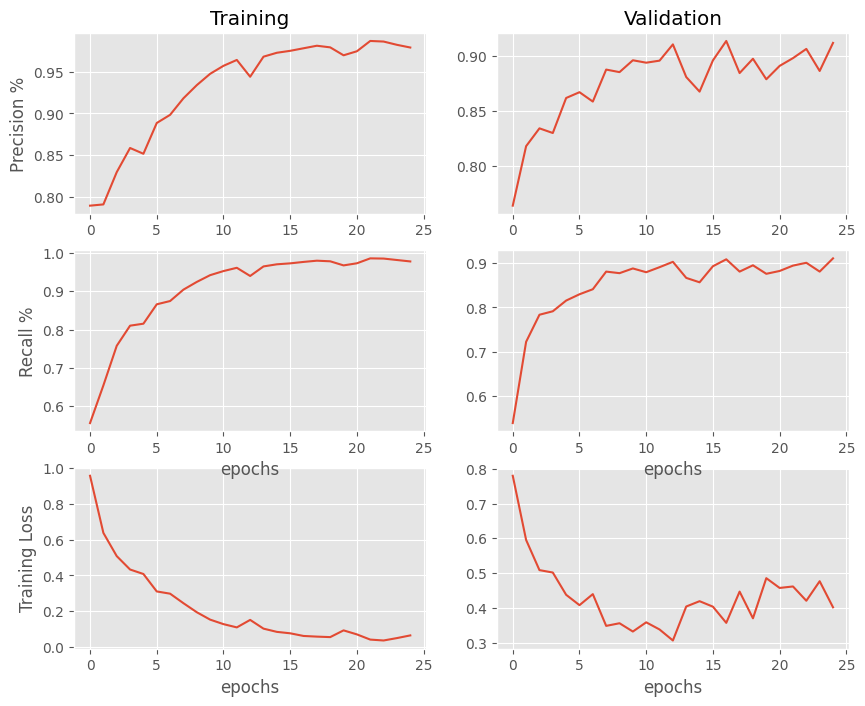

In [159]:
plt.figure(figsize=(10,8))
    
plt.subplot(3,2,1)
plt.plot(history.history['precision'])
plt.ylabel('Precision %')
plt.title('Training')
    
plt.subplot(3,2,2)
plt.plot(history.history['val_precision'])
plt.title('Validation')

plt.subplot(3,2,5)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(3,2,6)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
    
plt.subplot(3,2,3)
plt.plot(history.history['recall'])
plt.ylabel('Recall %')
plt.xlabel('epochs')
    
plt.subplot(3,2,4)
plt.plot(history.history['val_recall'])
plt.xlabel('epochs')


<h4>3.2 Comparison of Best Model (Model 2) and pretrained ResNet50 Performance</h4>

In [160]:
yhat_tansferlearning = np.argmax(tansferlearning_model.predict(x_test_resnet), axis=1)

print('The comparison between our best Model (Mode1) and transfer learning model RESNet50 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model2, y_model2=yhat_tansferlearning)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 4 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
The comparison between our best Model (Mode1) and transfer learning model RESNet50 with 95% confidence interval is as follows:
[[1104  300]
 [   1    0]]
chi² statistic: 295.0299003322259, p-value: 3.986744688442982e-66
Different proportions of errors (reject Null Hypothesis)


<p>The comparison between Model 2 (our best-performing model) and the pretrained ResNet50 model using McNemar's test shows that Model 2 significantly outperforms ResNet50 in terms of error proportions. The contingency table reveals that Model 2 correctly classified 300 cases where the ResNet50 model failed, while ResNet50 only corrected 1 case that Model 2 misclassified. The McNemar's test resulted in a chi² statistic of 295.03 and an extremely low p-value (3.99e−66), far below the significance threshold of 0.05. This indicates that the differences in error proportions between the two models are statistically significant. Based on this result, we reject the null hypothesis and conclude that Model 2 is more robust and reliable compared to the pretrained ResNet50 model in this task. While transfer learning with ResNet50 provides a solid baseline, Model 2 clearly outperforms it, demonstrating its superior ability to generalize and minimize classification errors.</p>

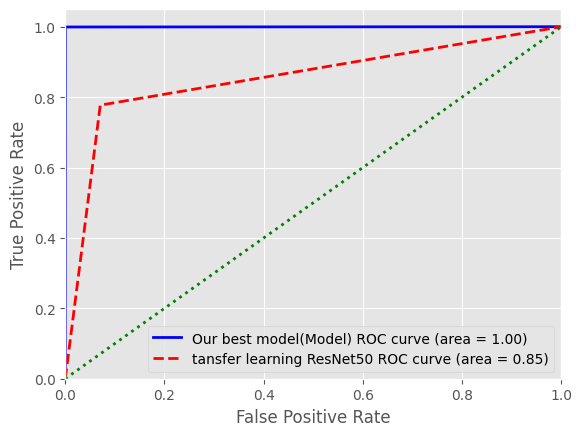

In [161]:
yhat_cnn5_ohe = pd.get_dummies(yhat_model2.reshape(-1,)).values
yhat_mlp_ohe = pd.get_dummies(yhat_tansferlearning.reshape(-1,)).values

n_classes = y_test_ohe.shape[1]

fpr_cnn5 = []
tpr_cnn5 = []
roc_auc_cnn5 = []

fpr_mlp = []
tpr_mlp = []
roc_auc_mlp = []

for i in range(n_classes):
    fpr_temp, tpr_temp, _ = roc_curve(y_test_ohe[:, i], yhat_cnn5_ohe[:, i])
    fpr_cnn5.append(fpr_temp)
    tpr_cnn5.append(tpr_temp)
    roc_auc_cnn5.append(auc(fpr_temp, tpr_temp))

    fpr_temp, tpr_temp, _ = roc_curve(y_test_ohe[:, i], yhat_mlp_ohe[:, i])
    fpr_mlp.append(fpr_temp)
    tpr_mlp.append(tpr_temp)
    roc_auc_mlp.append(auc(fpr_temp, tpr_temp))

fpr_cnn5_micro, tpr_cnn5_micro, _ = roc_curve(y_test_ohe.ravel(), yhat_cnn5_ohe.ravel())
roc_auc_cnn5_micro = auc(fpr_cnn5_micro, tpr_cnn5_micro)

fpr_mlp_micro, tpr_mlp_micro, _ = roc_curve(y_test_ohe.ravel(), yhat_mlp_ohe.ravel())
roc_auc_mlp_micro = auc(fpr_mlp_micro, tpr_mlp_micro)

fpr_mean_cnn5 = np.mean(fpr_cnn5, axis=0)
tpr_mean_cnn5 = np.mean(tpr_cnn5, axis=0)
roc_auc_mean_cnn5 = np.mean(roc_auc_cnn5)

fpr_mean_mlp = np.mean(fpr_mlp, axis=0)
tpr_mean_mlp = np.mean(tpr_mlp, axis=0)
roc_auc_mean_mlp = np.mean(roc_auc_mlp)

plt.figure()
lw = 2
plt.plot(fpr_mean_cnn5, tpr_mean_cnn5, color='blue',
         lw=lw, label='Our best model(Model) ROC curve (area = %0.2f)' % roc_auc_mean_cnn5)
plt.plot(fpr_mean_mlp, tpr_mean_mlp, color='red', linestyle='--',
         lw=lw, label='tansfer learning ResNet50 ROC curve (area = %0.2f)' % roc_auc_mean_mlp)

plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle=':')
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


<p>The ROC curve comparison clearly shows that our best model (Model 2) significantly outperforms the transfer learning ResNet50 model in terms of classification performance. Model 2 achieves a perfect ROC AUC score of 1.00, indicating its ability to flawlessly distinguish between positive and negative classes. The curve for Model 2 follows the ideal trajectory, adhering to the top-left corner, which represents maximum true positives and minimal false positives at all thresholds.

In contrast, the transfer learning ResNet50 model achieves an ROC AUC score of 0.85. While this is decent, it demonstrates that ResNet50 is less effective at separating the classes, with a noticeably higher false positive rate and lower true positive rate across various thresholds. The gap between the ROC AUC scores and the shape of the curves reinforces the conclusion that Model 2 is superior in terms of classification accuracy and reliability. This makes Model 2 the more suitable choice, particularly in applications where high precision and recall are critical.</p>

In [165]:
res_precision = np.array(history.history['val_precision'])
cnn2_precision = np.array(cnn2_precision)
res_precision_avg = np.mean(res_precision)
cnn2_precision_avg = np.mean(cnn2_precision)
print(f"Average Precision:\n- tansfer learning ResNet50: {res_precision_avg:.4f}\n- CNN2: {cnn2_precision_avg:.4f}")

Average Precision:
- tansfer learning ResNet50: 0.8764
- CNN2: 0.9790


In [164]:
res_recall = np.array(history.history['val_recall']) 
cnn2_recall = np.array(cnn2_recall) 
res_recall_avg = np.mean(res_recall) 
cnn2_recall_avg = np.mean(cnn2_recall)
print(f"Average Recall :\n- tansfer learning ResNet50: {res_recall_avg:.4f}\n- CNN2: {cnn2_precision_avg:.4f}")

Average Recall :
- tansfer learning ResNet50: 0.8517
- CNN2: 0.9790


<p>The comparison of average precision and recall between the transfer learning ResNet50 model and CNN2 further highlights the superior performance of CNN2. CNN2 achieves an impressive average precision of 0.9790, significantly surpassing the ResNet50 model's precision of 0.8764. This indicates that CNN2 is better at minimizing false positives while maintaining a high accuracy in identifying true positives.

Similarly, for recall, CNN2 outperforms ResNet50 with an average recall of 0.9790 compared to ResNet50's 0.8517. This shows that CNN2 is more effective at identifying all positive cases, reducing false negatives. These metrics clearly demonstrate that CNN2 is more robust and reliable for classification tasks, making it a better choice, especially in critical applications where both precision and recall are vital for success.</p>

<h4>References</h4>
<ul>
    <li>Precision/Recall of multi class use argmax and micro averaging: <a href="https://www.tensorflow.org/tutorials/structured_data/imbalanced_data" target="_blank">https://www.tensorflow.org/tutorials/structured_data/imbalanced_data</a></li>
    <li>Precision/Recall of multi class use argmax and micro averaging: <a href="https://keras.io/api/metrics/classification_metrics/?utm_source=chatgpt.com" target="_blank">https://keras.io/api/metrics/classification_metrics/?utm_source=chatgpt.com</a></li>
    <li>Machine Learning Notebooks by eclarson (GitHub Repository): <a href="https://github.com/eclarson/MachineLearningNotebooks" target="_blank">https://github.com/eclarson/MachineLearningNotebooks</a></li>
    <li>OpenAI GPT Model: <a href="https://chatgpt.com/" target="_blank">https://chatgpt.com/</a></li>
    <li>Brain Tumor MRI Dataset: <a href="https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset" target="_blank">https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset</a></li>
</ul>
